In [1]:
import pickle5 as pickle

In [2]:
import numpy as np
import pandas as pd
import csv
import joblib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, auc

In [3]:
file = open('imbalanced_data.pickle', 'rb')
df1 = pickle.load(file)
file.close()

In [4]:
display(df1)

{'X_subtrain': array([[0.000000e+00, 1.125000e+05, 6.300000e+05, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [0.000000e+00, 1.350000e+05, 8.799345e+05, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [0.000000e+00, 1.575000e+05, 5.212800e+05, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        ...,
        [1.000000e+00, 6.750000e+04, 2.025000e+05, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [0.000000e+00, 2.115000e+05, 4.266000e+05, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [1.000000e+00, 1.125000e+05, 2.700000e+05, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00]]),
 'X_valid': array([[0.000000e+00, 1.350000e+05, 5.212800e+05, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [0.000000e+00, 1.800000e+05, 8.086500e+05, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [0.000000e+00, 2.025000e+05, 7.881030e+05, ..., 0.000000e+00,
         0.000000e+00, 0.0

In [5]:
print(df1['X_subtrain'])
print(df1['X_subtrain'].shape)
print(type(df1['X_subtrain']))

[[0.000000e+00 1.125000e+05 6.300000e+05 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [0.000000e+00 1.350000e+05 8.799345e+05 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [0.000000e+00 1.575000e+05 5.212800e+05 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 ...
 [1.000000e+00 6.750000e+04 2.025000e+05 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [0.000000e+00 2.115000e+05 4.266000e+05 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [1.000000e+00 1.125000e+05 2.700000e+05 ... 0.000000e+00 0.000000e+00
  0.000000e+00]]
(207569, 177)
<class 'numpy.ndarray'>


In [6]:
dff = pd.read_csv('preprocessed_data.csv')
dff = dff.drop(['Unnamed: 0', 'TARGET', 'SK_ID_CURR'], axis=1)
display(dff)

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-637.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1188.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-225.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,-3039.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,-3038.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.0,157500.0,254700.0,27558.0,225000.0,0.032561,-236.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307507,0.0,72000.0,269550.0,12001.5,225000.0,0.025164,365243.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
307508,0.0,153000.0,677664.0,29979.0,585000.0,0.005002,-7921.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307509,0.0,171000.0,370107.0,20205.0,319500.0,0.005313,-4786.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
print(dff.columns)

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       ...
       'ORGANIZATION_TYPE_Trade: type 4', 'ORGANIZATION_TYPE_Trade: type 5',
       'ORGANIZATION_TYPE_Trade: type 6', 'ORGANIZATION_TYPE_Trade: type 7',
       'ORGANIZATION_TYPE_Transport: type 1',
       'ORGANIZATION_TYPE_Transport: type 2',
       'ORGANIZATION_TYPE_Transport: type 3',
       'ORGANIZATION_TYPE_Transport: type 4', 'ORGANIZATION_TYPE_University',
       'ORGANIZATION_TYPE_XNA'],
      dtype='object', length=177)


In [8]:
xim_subtrain = df1['X_subtrain']
xim_valid = df1['X_valid']
xim_test = df1['X_test']
yim_subtrain = df1['y_subtrain']
yim_valid = df1['y_valid']
yim_test = df1['y_test']

In [7]:
#old version
def specificity_score(y_true, y_predict):
    conf = confusion_matrix(y_true=y_true, y_pred=y_predict)
    return conf[0,0]/(conf[0,0]+conf[0, 1])

def opt_score(y_true, y_predict):
    target1_pro = 0.919271
    target0_pro = 1 - target1_pro
    
    opt_score = specificity_score(y_true, y_predict)*target1_pro*0.03 - (1-recall_score(y_true, y_predict))*target0_pro
    return (opt_score+0.1)*5

In [9]:
#new version
def specificity_score(y_true, y_predict):
    from sklearn.metrics import confusion_matrix
    conf = confusion_matrix(y_true=y_true, y_pred=y_predict)
    return conf[0,0]/(conf[0,0]+conf[0, 1])

def opt_score(y_true, y_predict, x_train):
    import numpy as np
    pos_index = (y_predict > 0.5).nonzero()
    neg_index = (y_predict < 0.5).nonzero()
    true_index = (y_true == 1).nonzero()
    false_index = (y_true == 0).nonzero()
    
    # specificity 
    s_index = np.intersect1d(neg_index, false_index)
    s_loss = x_train[s_index,3].sum() # annuty
    # (1-recall)
    invr_index = np.intersect1d(neg_index, true_index)
    invr_loss = x_train[invr_index, 2].sum() # credict
    
    return (s_loss - invr_loss)/x_train.shape[0]

## Logistic Regression

### using imbalanced data
### L2 penalty

In [17]:
LR_a = 0.0
max_score = -10**10

accuracies_im1 = []
recalls_im1 = []
f1s_im1 = []
precisions_im1 = []
opts_im1 = []
specificities_im1 = []

for i in np.logspace(-2,2,20):
    sk_current = LogisticRegression(C = 1/i).fit(xim_subtrain, yim_subtrain)
    sk_ypred = sk_current.predict(xim_valid)
    score = opt_score(yim_valid, sk_ypred, xim_valid)
    
    accuracies_im1.append(accuracy_score(yim_valid, sk_ypred))
    recalls_im1.append(recall_score(yim_valid, sk_ypred))
    f1s_im1.append(f1_score(yim_valid, sk_ypred))
    precisions_im1.append(0)
    specificities_im1.append(specificity_score(yim_valid, sk_ypred))
    opts_im1.append(score)
    
    if score > max_score:
        max_score = score
        LR_a = i

precision會除以0，所以都 append 0

In [18]:
result_im1 = pd.DataFrame()
result_im1['C'] = np.logspace(-2,2,20)
result_im1['Accuracy'] = accuracies_im1
result_im1['Precision'] = precisions_im1
result_im1['Recall'] = recalls_im1
result_im1['F1 Score'] = f1s_im1
result_im1['Specificity'] = specificities_im1
result_im1['Opt Score'] = opts_im1

display(result_im1)

,C,Accuracy,Precision,Recall,F1 Score,Specificity,Opt Score
0,0.010000,0.918673,0,0.0,0.0,1.0,-19836.756513
1,0.016238,0.918673,0,0.0,0.0,1.0,-19836.756513
2,0.026367,0.918673,0,0.0,0.0,1.0,-19836.756513
3,0.042813,0.918673,0,0.0,0.0,1.0,-19836.756513
4,0.069519,0.918673,0,0.0,0.0,1.0,-19836.756513
5,0.112884,0.918673,0,0.0,0.0,1.0,-19836.756513
6,0.183298,0.918673,0,0.0,0.0,1.0,-19836.756513
7,0.297635,0.918673,0,0.0,0.0,1.0,-19836.756513
8,0.483293,0.918673,0,0.0,0.0,1.0,-19836.756513
9,0.784760,0.918673,0,0.0,0.0,1.0,-19836.756513


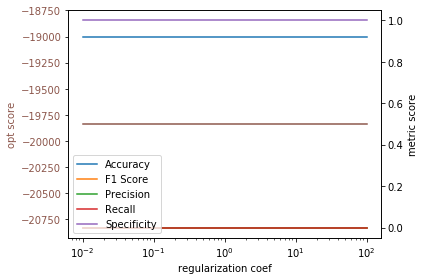

In [19]:
fig, ax1 = plt.subplots()

color = 'tab:brown'
ax1.set_xlabel('regularization coef')
ax1.set_ylabel('opt score', color=color)
ax1.plot(result_im1['C'], result_im1['Opt Score'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('metric score')  # we already handled the x-label with ax1

#ax2.tick_params(axis='y', labelcolor=color)
for x in ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Specificity']:
    ax2.plot(result_im1['C'], result_im1[x], label = x)

ax2.legend( loc='lower left')
plt.xscale('log') 
plt.xlabel('regularization coef')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('im1.png', transparent = True)
plt.show()

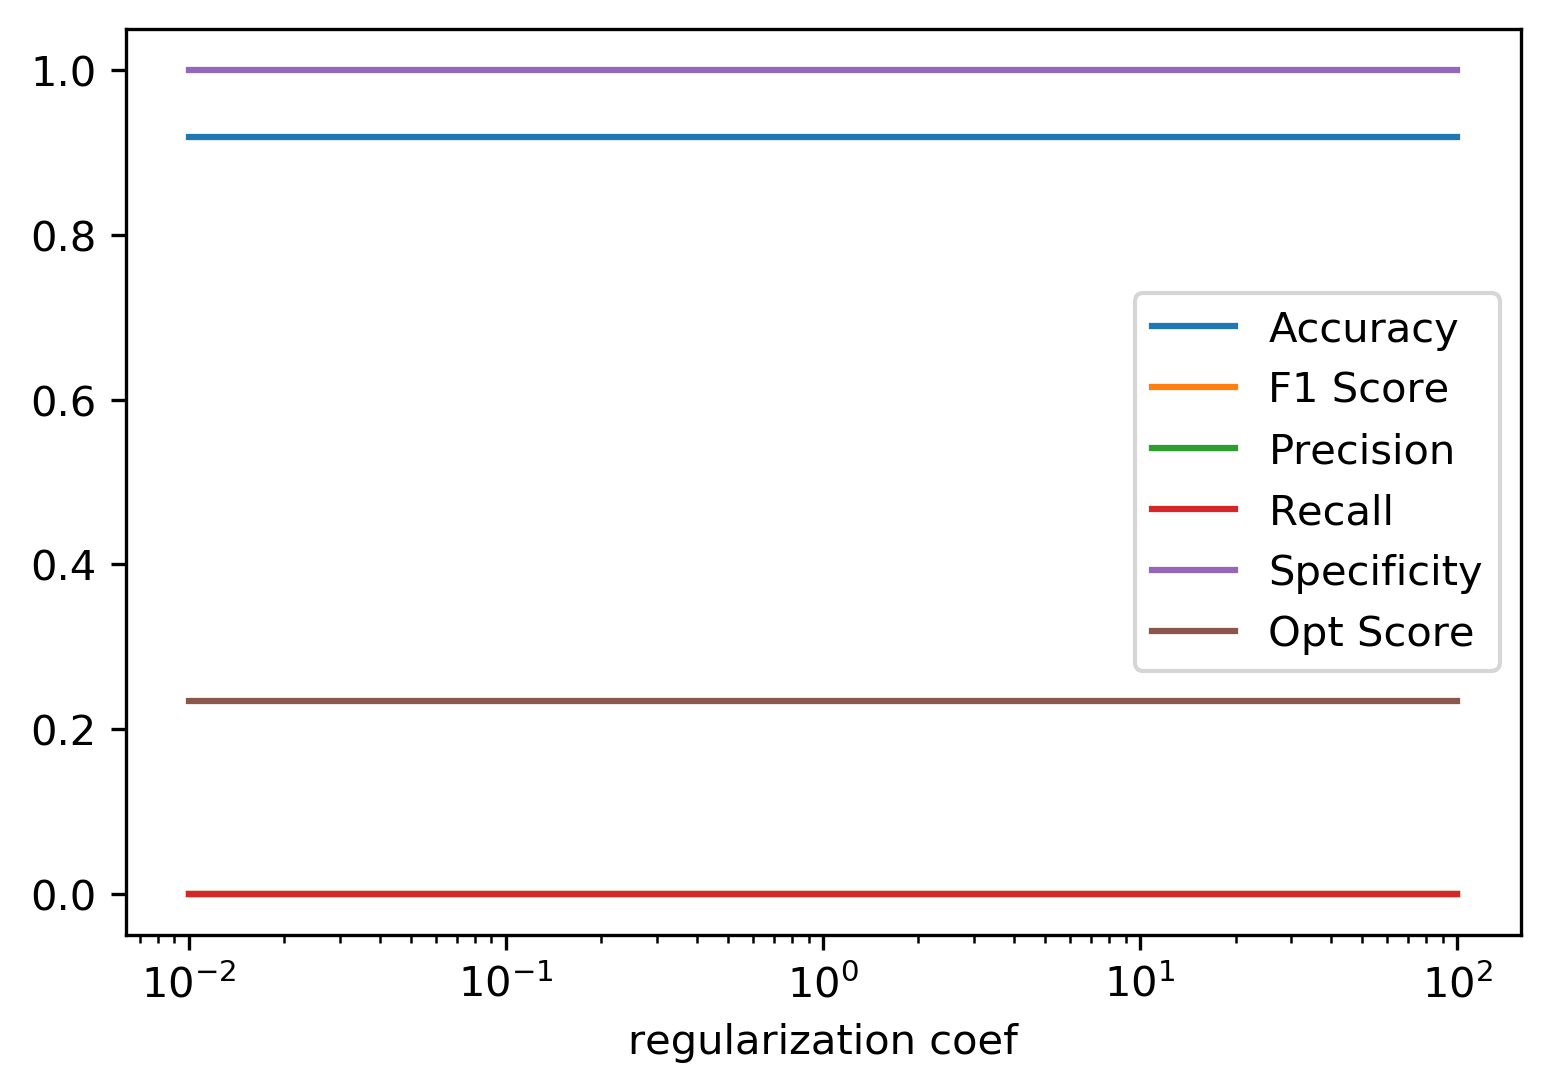

In [41]:
for x in ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Specificity', 'Opt Score']:
    plt.plot(result_im1['C'], result_im1[x], label = x)
plt.legend()
plt.xscale('log') 
plt.xlabel('regularization coef')
plt.savefig('im1.png', transparent = True)
plt.show()

In [20]:
print(LR_a)
print(max_score)

0.01
-19836.756512501808


In [21]:
xim_train = np.r_[xim_subtrain, xim_valid]
yim_train = np.r_[yim_subtrain, yim_valid]

In [22]:
sk_current = LogisticRegression(C = 1/LR_a)
sk_current.fit(xim_train, yim_train)
joblib.dump(sk_current, 'imbalanced_model')
sk_ypred = sk_current.predict(xim_test)
score = opt_score(yim_test, sk_ypred, xim_test)

accuracy_im = accuracy_score(yim_test, sk_ypred)
recall_im = recall_score(yim_test, sk_ypred)
f1_im = f1_score(yim_test, sk_ypred)
precision_im = 0
specificity_im = specificity_score(yim_test, sk_ypred)
opt_im = score

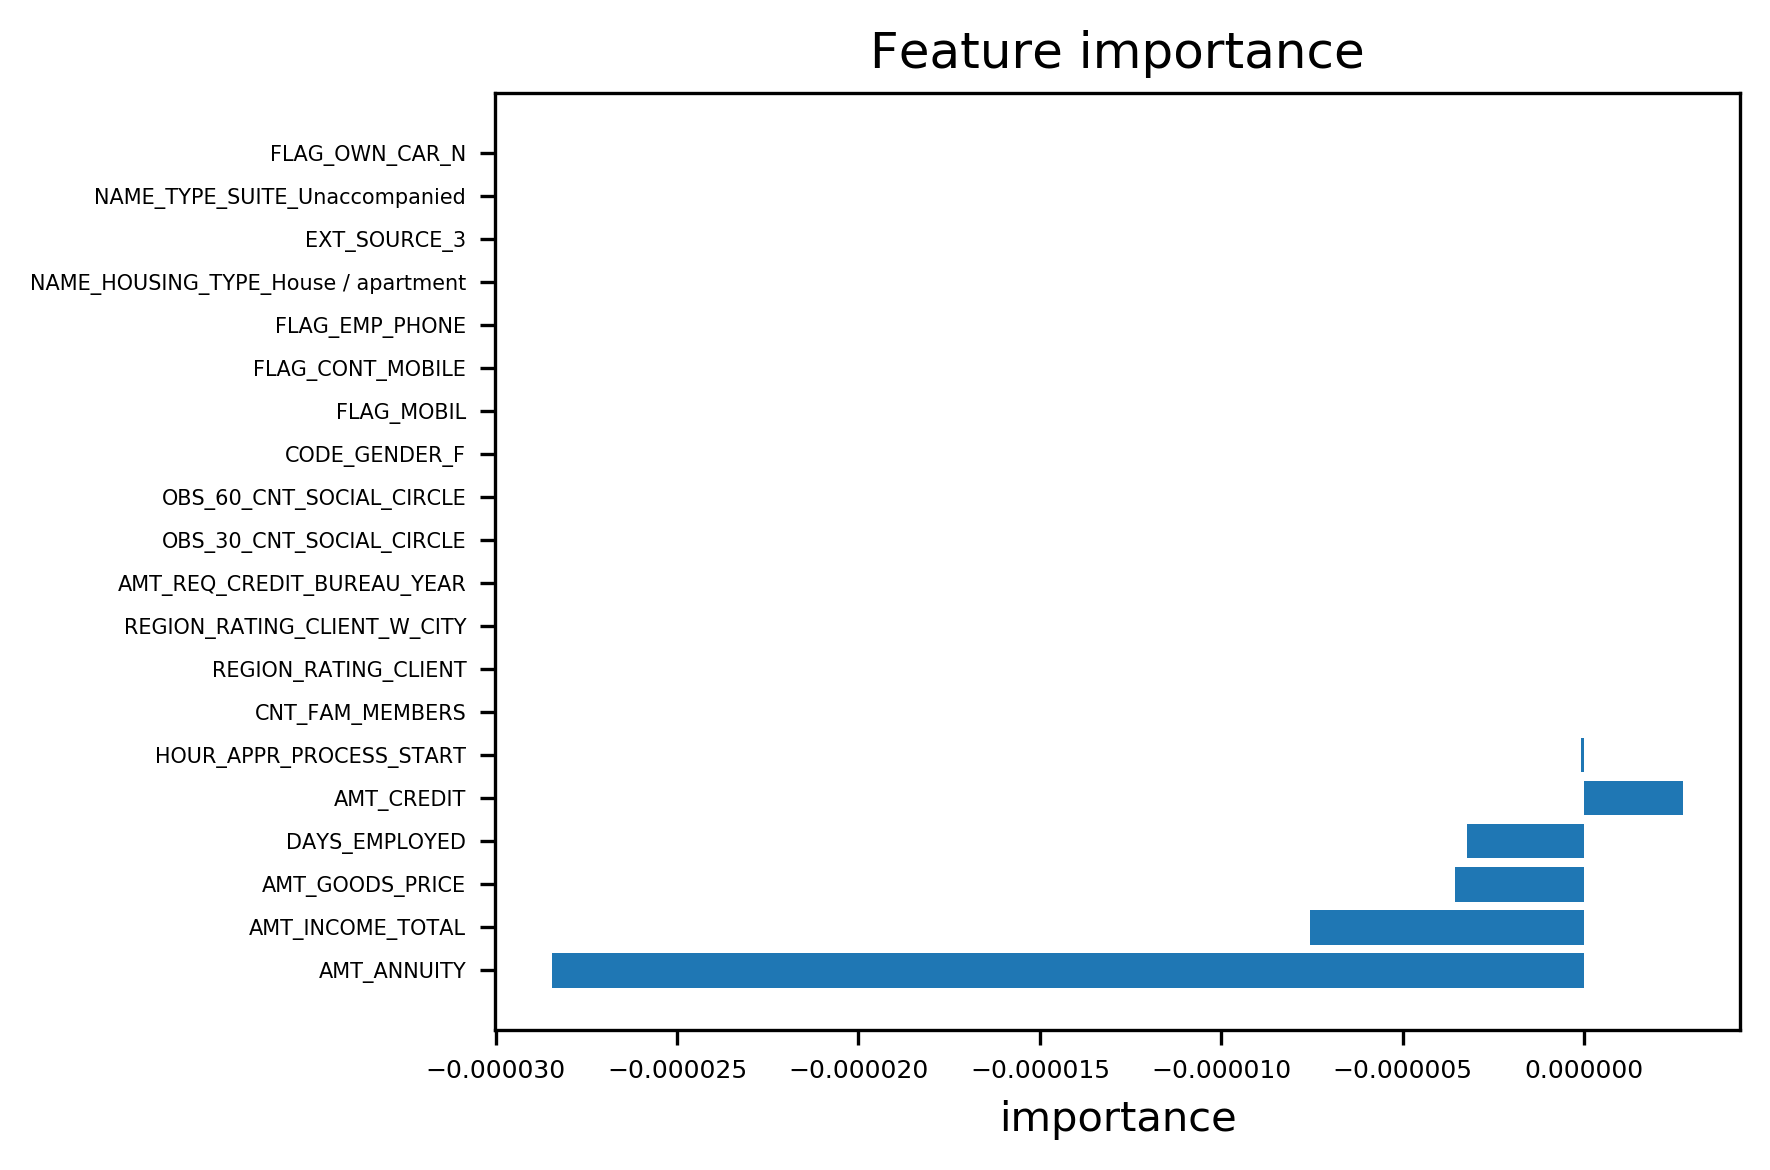

In [23]:
coef = sk_current.coef_[0].copy()
sorted_coef = sorted(range(len(coef)), key = lambda s: abs(coef[s]), reverse = True)
top20_f = []
top20_c = []
for i in range(20):
    top20_f.append(dff.columns[sorted_coef[i]])
    top20_c.append(coef[sorted_coef[i]])

plt.rcParams['figure.dpi'] = 300
plt.barh(top20_f, top20_c,)
plt.xlabel('importance')
plt.xticks(fontsize=6)
plt.yticks(fontsize=5)
plt.title('Feature importance')
plt.tight_layout()
plt.savefig('important_features_im.png', transparent = True)
plt.show()

In [24]:
top20_c

[-2.8447219012497215e-05,
 -7.560416788473856e-06,
 -3.5452498002661346e-06,
 -3.2383033593176513e-06,
 2.7371400056467014e-06,
 -8.972053155000973e-08,
 -1.6210351737918097e-08,
 -1.4413550840881115e-08,
 -1.4343613517816263e-08,
 -9.67127372696134e-09,
 -9.099953732919977e-09,
 -9.003860397456892e-09,
 -7.57995105842447e-09,
 -7.23401330266076e-09,
 -7.208583295011959e-09,
 -7.1562332699985906e-09,
 -6.5999084042079415e-09,
 -5.705824538104693e-09,
 -5.62102432090971e-09,
 -5.356308645609151e-09]

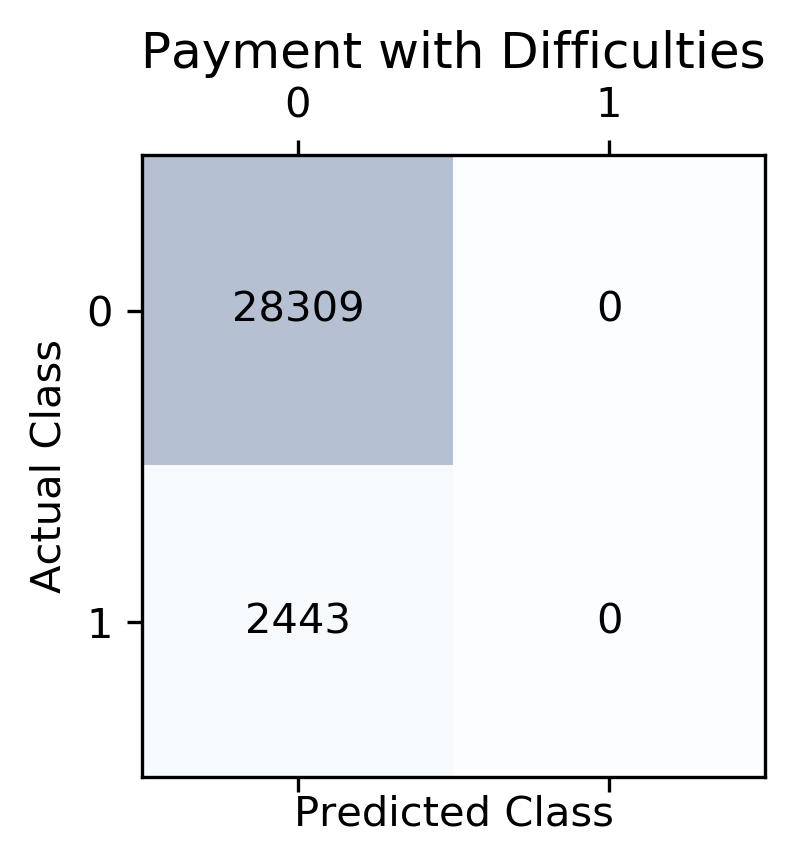

In [25]:
confmat = confusion_matrix(y_true=yim_test, y_pred=sk_ypred)
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xticks([0, 1], [0, 1])
plt.yticks([0, 1], [0, 1])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Payment with Difficulties', y=1.1)
plt.tight_layout()
plt.savefig('imbalanced_confusion_matrix.png', transparent = True)
plt.show()

In [26]:
print("Accuracy: ", accuracy_im)
print("Recall: ", recall_im)
print("F1: ", f1_im)
print("Precision: ", precision_im)
print("Specificity: ", specificity_im)
print("Opt score: ", opt_im)

Accuracy:  0.9205580124869928
Recall:  0.0
F1:  0.0
Precision:  0
Specificity:  1.0
Opt score:  -19238.40286810614


AUC: 0.554161


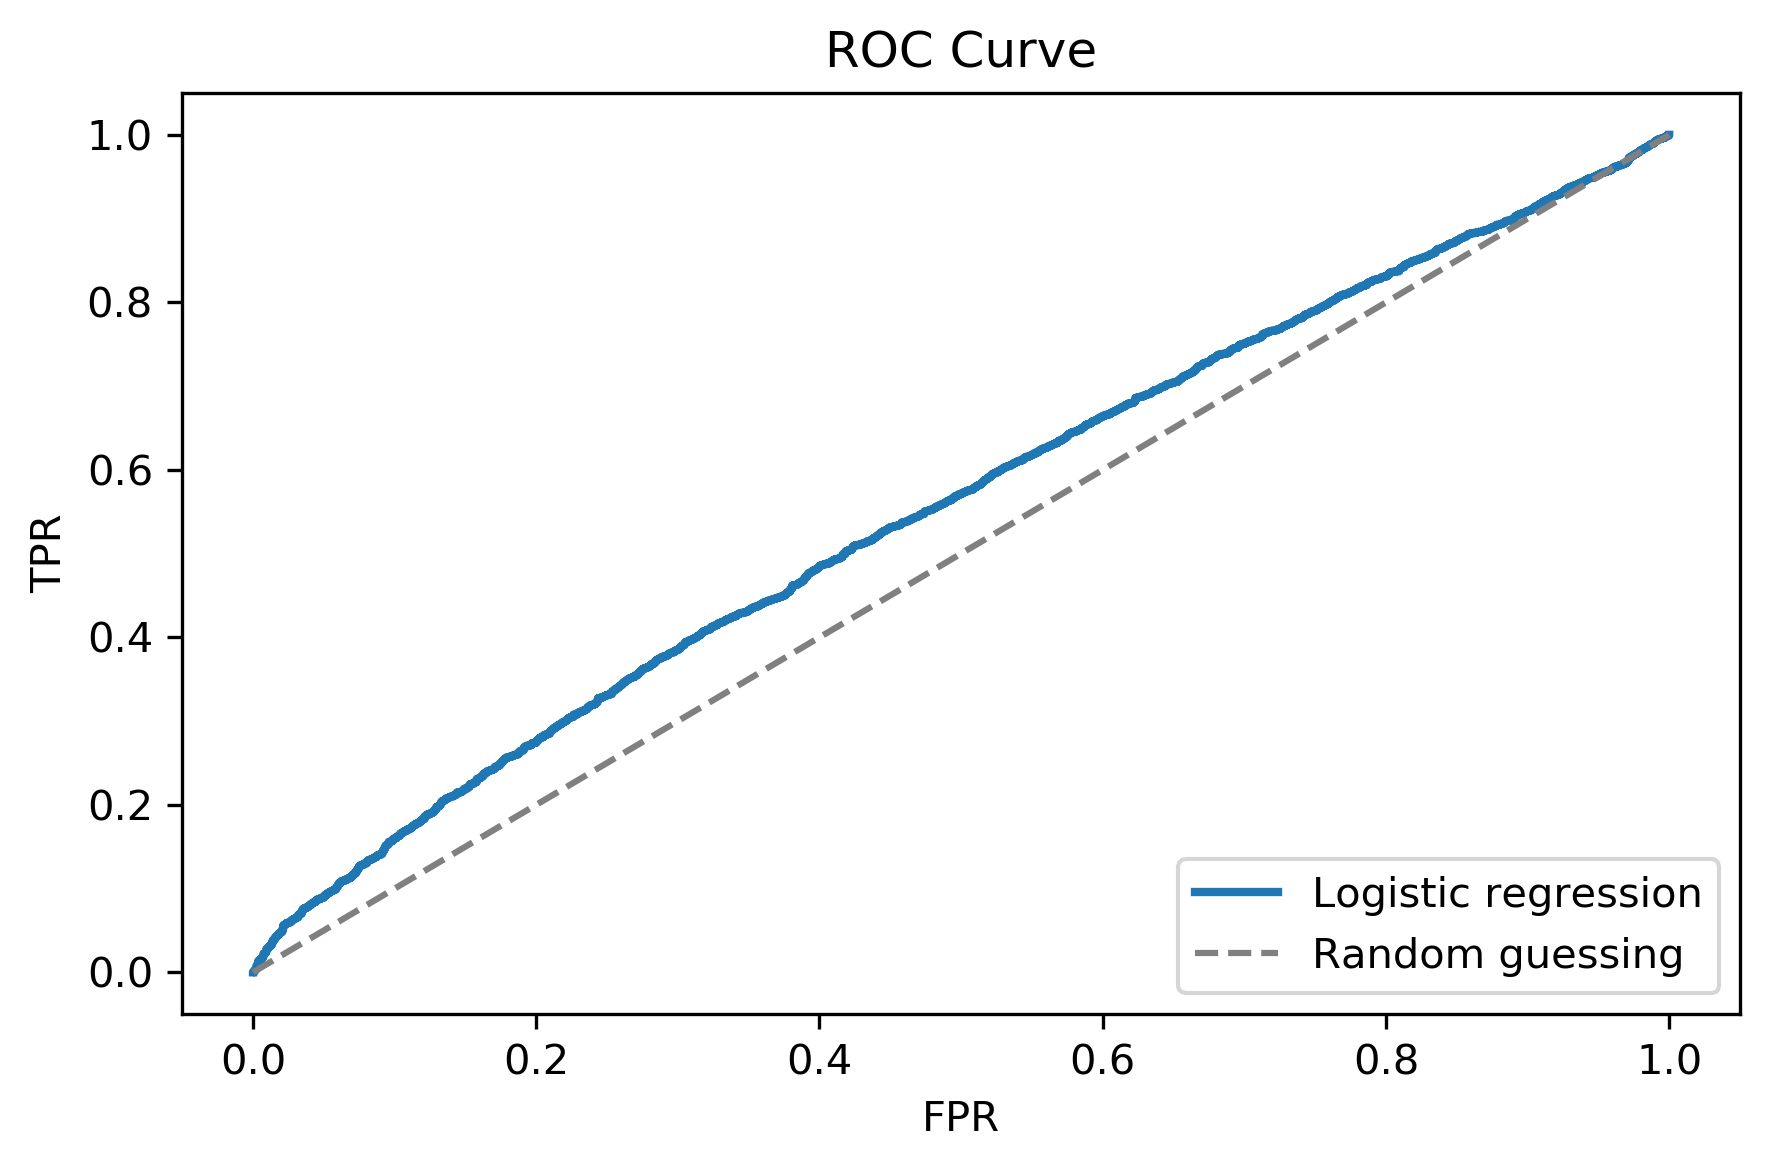

In [27]:
probas = sk_current.predict_proba(xim_test)
fpr, tpr, thresholds = roc_curve(yim_test, probas[:, 0], pos_label=0)
print('AUC: %f' %(auc(fpr, tpr)))

plt.plot(fpr, tpr, lw=2, label='Logistic regression')  
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random guessing')
#plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', color='gray', label='Perfect')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig('ROC_im.png', transparent = True)
plt.show()

### using balanced data (under sampling)

In [28]:
file = open('balanced_data_under_sampling.pickle', 'rb')
df2 = pickle.load(file)
file.close()

In [29]:
display(df2)

{'X_subtrain': array([[2.000000e+00, 9.000000e+04, 1.350000e+05, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [0.000000e+00, 1.800000e+05, 1.885536e+06, ..., 0.000000e+00,
         0.000000e+00, 1.000000e+00],
        [0.000000e+00, 6.075000e+04, 3.270240e+05, ..., 0.000000e+00,
         0.000000e+00, 1.000000e+00],
        ...,
        [1.000000e+00, 8.100000e+04, 1.332000e+06, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [1.000000e+00, 1.305000e+05, 1.288350e+06, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [0.000000e+00, 1.800000e+05, 1.048500e+06, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00]]),
 'X_valid': array([[0.000000e+00, 2.700000e+05, 7.908300e+05, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [0.000000e+00, 5.400000e+04, 2.250000e+05, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [0.000000e+00, 2.115000e+05, 7.819200e+05, ..., 0.000000e+00,
         0.000000e+00, 0.0

In [30]:
xbu_subtrain = df2['X_subtrain']
xbu_valid = df2['X_valid']
xbu_test = df2['X_test']
ybu_subtrain = df2['y_subtrain']
ybu_valid = df2['y_valid']
ybu_test = df2['y_test']

In [31]:
LR_bu = 0.0
max_score_bu = -10**10

accuracies_bu1 = []
recalls_bu1 = []
f1s_bu1 = []
precisions_bu1 = []
opts_bu1 = []
specificities_bu1 = []

for i in np.logspace(8,12,20):
    sk_current = LogisticRegression(C = 1/i).fit(xbu_subtrain, ybu_subtrain)
    sk_ypred = sk_current.predict(xbu_valid)
    score = opt_score(ybu_valid, sk_ypred, xbu_valid)
    
    accuracies_bu1.append(accuracy_score(ybu_valid, sk_ypred))
    recalls_bu1.append(recall_score(ybu_valid, sk_ypred))
    f1s_bu1.append(f1_score(ybu_valid, sk_ypred))
    precisions_bu1.append(precision_score(ybu_valid, sk_ypred))
    specificities_bu1.append(specificity_score(ybu_valid, sk_ypred))
    opts_bu1.append(score)
    
    if score > max_score_bu:
        max_score_bu = score
        LR_bu = i

In [32]:
result_bu1 = pd.DataFrame()
result_bu1['C'] = np.logspace(8,12,20)
result_bu1['Accuracy'] = accuracies_bu1
result_bu1['Precision'] = precisions_bu1
result_bu1['Recall'] = recalls_bu1
result_bu1['F1 Score'] = f1s_bu1
result_bu1['Specificity'] = specificities_bu1
result_bu1['Opt Score'] = opts_bu1

display(result_bu1)

,C,Accuracy,Precision,Recall,F1 Score,Specificity,Opt Score
0,1.000000e+08,0.567490,0.561371,0.598129,0.579167,0.537146,-118317.316595
1,1.623777e+08,0.567490,0.561371,0.598129,0.579167,0.537146,-118317.316595
2,2.636651e+08,0.567490,0.561371,0.598129,0.579167,0.537146,-118317.316595
3,4.281332e+08,0.567490,0.561371,0.598129,0.579167,0.537146,-118317.316595
4,6.951928e+08,0.567490,0.561371,0.598129,0.579167,0.537146,-118317.316595
5,1.128838e+09,0.567490,0.561371,0.598129,0.579167,0.537146,-118317.316595
6,1.832981e+09,0.567490,0.561371,0.598129,0.579167,0.537146,-118317.316595
7,2.976351e+09,0.567669,0.561581,0.597949,0.579195,0.537680,-118325.952470
8,4.832930e+09,0.567669,0.561581,0.597949,0.579195,0.537680,-118325.952470
9,7.847600e+09,0.567669,0.561581,0.597949,0.579195,0.537680,-118325.952470


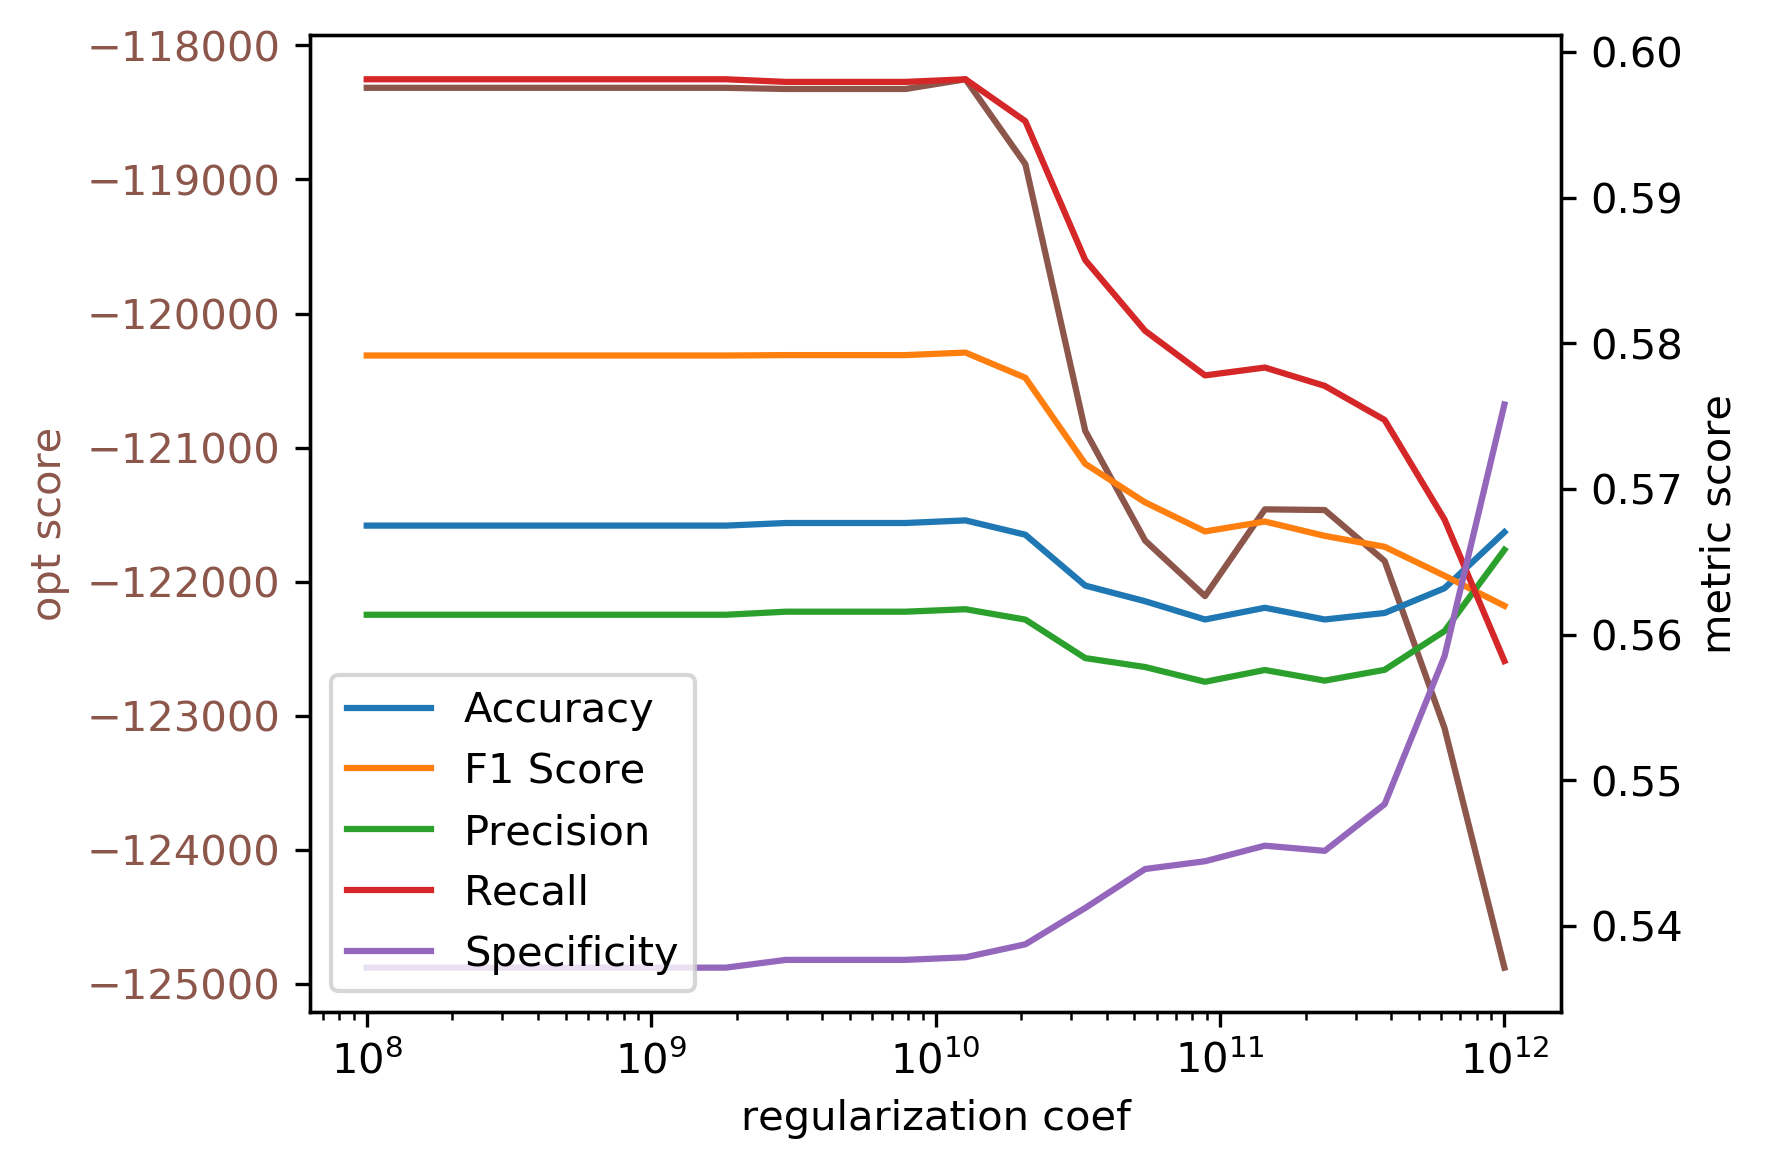

In [33]:
fig, ax1 = plt.subplots()

color = 'tab:brown'
ax1.set_xlabel('regularization coef')
ax1.set_ylabel('opt score', color=color)
ax1.plot(result_bu1['C'], result_bu1['Opt Score'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('metric score')  # we already handled the x-label with ax1

#ax2.tick_params(axis='y', labelcolor=color)
for x in ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Specificity']:
    ax2.plot(result_bu1['C'], result_bu1[x], label = x)

ax2.legend( loc='lower left')
plt.xscale('log') 
plt.xlabel('regularization coef')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('bu1.png', transparent = True)
plt.show()

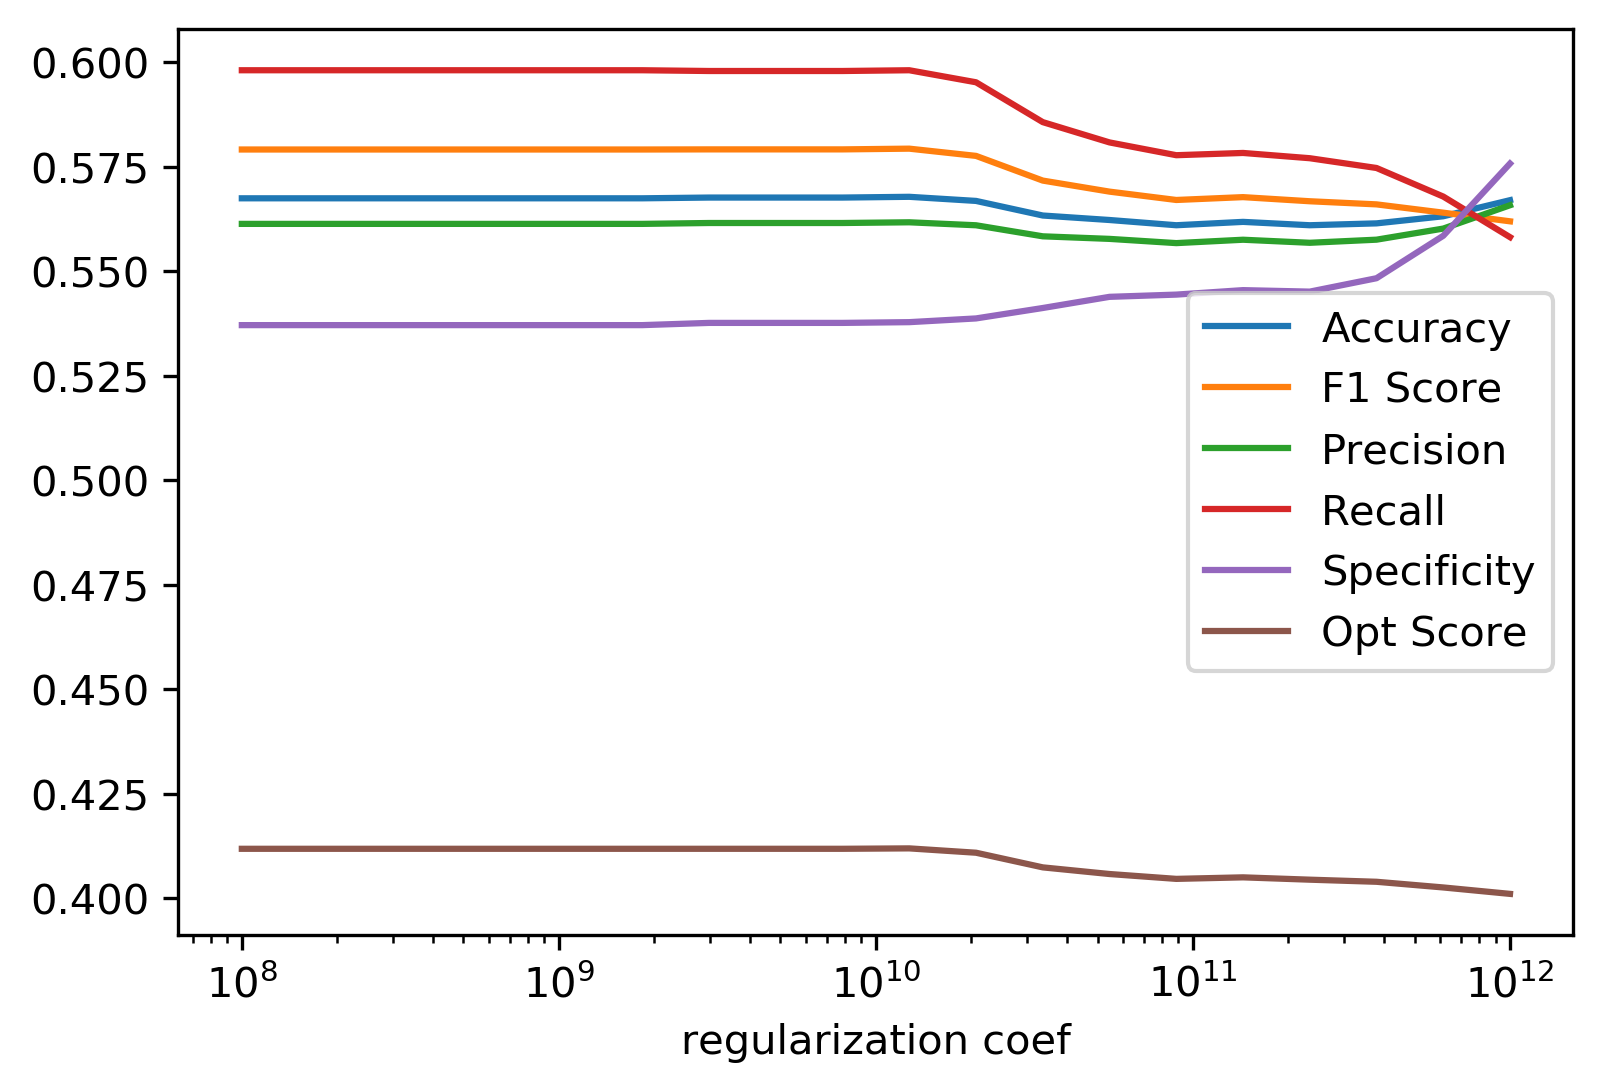

In [45]:
for x in ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Specificity', 'Opt Score']:
    plt.plot(result_bu1['C'], result_bu1[x], label = x)
plt.legend()
plt.xscale('log') 
plt.xlabel('regularization coef')
plt.savefig('bu1.png', transparent = True)
plt.show()

In [34]:
print(LR_bu)
print(max_score_bu)

12742749857.03132
-118253.61251342643


In [41]:
#plt.rcParams['figure.dpi'] = 300
#plt.savefig('under_sampling1.png', transparent = True)

<Figure size 1800x1200 with 0 Axes>

In [36]:
LR_bu2 = 0.0
max_score_bu2 = -10**10

accuracies_bu2 = []
recalls_bu2 = []
f1s_bu2 = []
precisions_bu2 = []
opts_bu2 = []
specificities_bu2 = []

for i in np.logspace(9,15,20):
    sk_current = LogisticRegression(C = 1/i).fit(xbu_subtrain, ybu_subtrain)
    sk_ypred = sk_current.predict(xbu_valid)
    score = opt_score(ybu_valid, sk_ypred, xbu_valid)
    
    accuracies_bu2.append(accuracy_score(ybu_valid, sk_ypred))
    recalls_bu2.append(recall_score(ybu_valid, sk_ypred))
    f1s_bu2.append(f1_score(ybu_valid, sk_ypred))
    precisions_bu2.append(precision_score(ybu_valid, sk_ypred))
    specificities_bu2.append(specificity_score(ybu_valid, sk_ypred))
    opts_bu2.append(score)
    
    if score > max_score_bu2:
        max_score_bu2 = score
        LR_bu2 = i

In [37]:
result_bu2 = pd.DataFrame()
result_bu2['C'] = np.logspace(9,15,20)
result_bu2['Accuracy'] = accuracies_bu2
result_bu2['Precision'] = precisions_bu2
result_bu2['Recall'] = recalls_bu2
result_bu2['F1 Score'] = f1s_bu2
result_bu2['Specificity'] = specificities_bu2
result_bu2['Opt Score'] = opts_bu2

display(result_bu2)

,C,Accuracy,Precision,Recall,F1 Score,Specificity,Opt Score
0,1.000000e+09,0.567490,0.561371,0.598129,0.579167,0.537146,-118317.316595
1,2.069138e+09,0.567490,0.561371,0.598129,0.579167,0.537146,-118317.316595
2,4.281332e+09,0.567669,0.561581,0.597949,0.579195,0.537680,-118325.952470
3,8.858668e+09,0.567759,0.561655,0.598129,0.579319,0.537680,-118255.963212
4,1.832981e+10,0.567222,0.561273,0.596510,0.578355,0.538215,-118606.651047
5,3.792690e+10,0.562746,0.557884,0.584278,0.570776,0.541422,-121144.646617
6,7.847600e+10,0.561404,0.557116,0.578162,0.567444,0.544807,-122039.179511
7,1.623777e+11,0.561851,0.557519,0.578881,0.567999,0.544985,-121211.566595
8,3.359818e+11,0.561583,0.557568,0.575823,0.566549,0.547479,-121658.687030
9,6.951928e+11,0.564626,0.561976,0.566829,0.564392,0.562444,-123165.420918


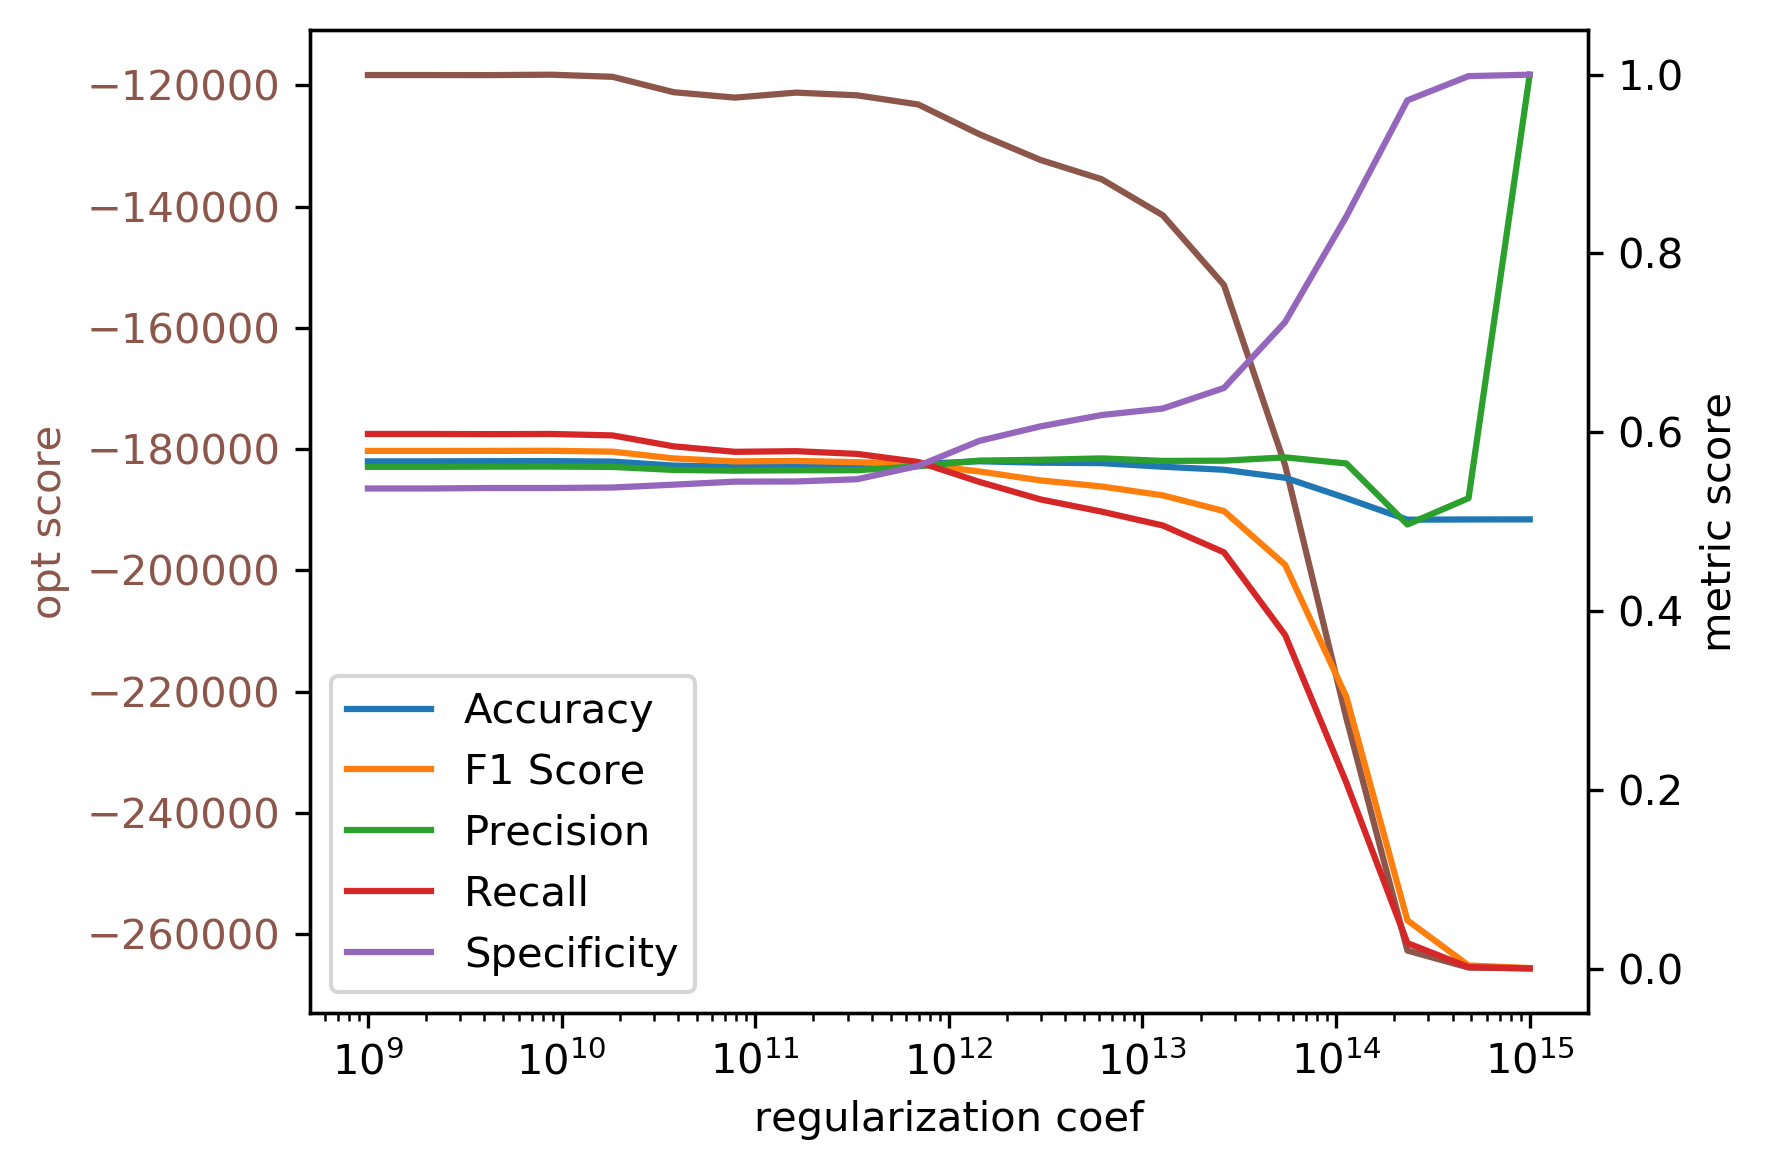

In [38]:
fig, ax1 = plt.subplots()

color = 'tab:brown'
ax1.set_xlabel('regularization coef')
ax1.set_ylabel('opt score', color=color)
ax1.plot(result_bu2['C'], result_bu2['Opt Score'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('metric score')  # we already handled the x-label with ax1

#ax2.tick_params(axis='y', labelcolor=color)
for x in ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Specificity']:
    ax2.plot(result_bu2['C'], result_bu2[x], label = x)

ax2.legend( loc='lower left')
plt.xscale('log') 
plt.xlabel('regularization coef')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('bu2.png', transparent = True)
plt.show()

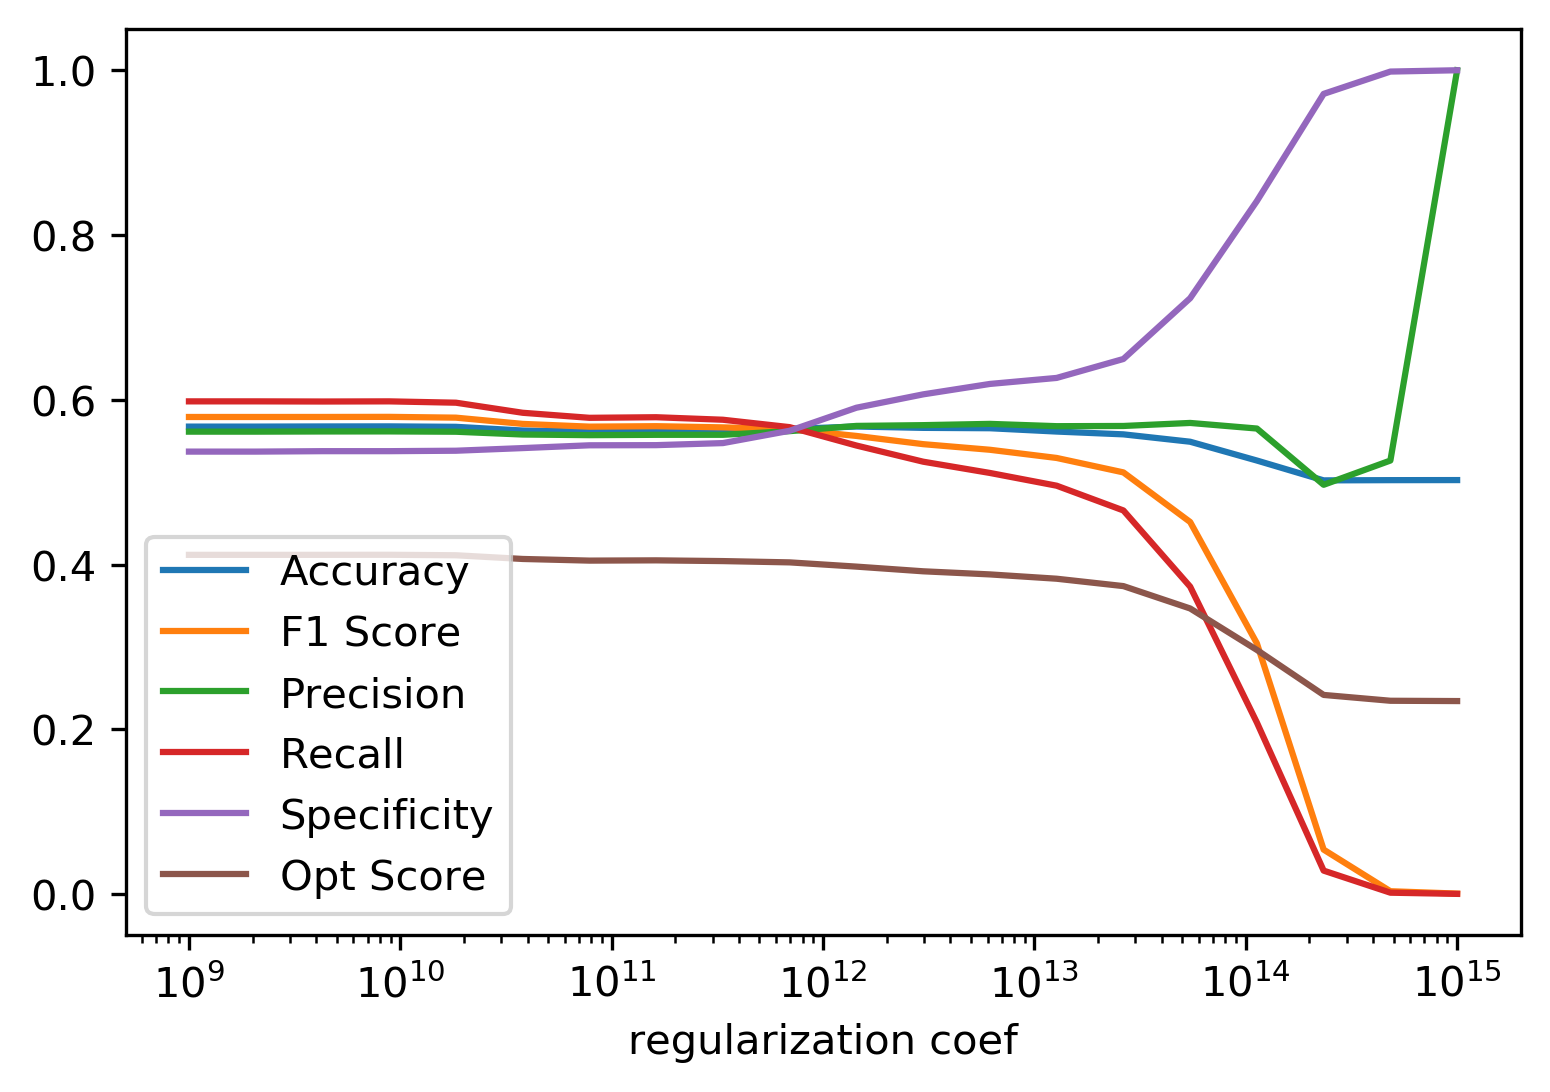

In [58]:
for x in ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Specificity', 'Opt Score']:
    plt.plot(result_bu2['C'], result_bu2[x], label = x)
plt.legend()
plt.xscale('log') 
plt.xlabel('regularization coef')
plt.savefig('bu2.png', transparent = True)
plt.show()

In [39]:
print(LR_bu2)
print(max_score_bu2)

8858667904.100832
-118255.96321160044


In [45]:
#plt.rcParams['figure.dpi'] = 300
#plt.savefig('under_sampling2.png', transparent = True)

<Figure size 1800x1200 with 0 Axes>

In [40]:
xbu_train = np.r_[xbu_subtrain, xbu_valid]
ybu_train = np.r_[ybu_subtrain, ybu_valid]

In [41]:
sk_current = LogisticRegression(C = 1/LR_bu).fit(xbu_train, ybu_train)
joblib.dump(sk_current, 'undersampling_model')
sk_ypred = sk_current.predict(xbu_test)
score = opt_score(ybu_test, sk_ypred, xbu_test)

accuracy_bu = accuracy_score(ybu_test, sk_ypred)
recall_bu = recall_score(ybu_test, sk_ypred)
f1_bu = f1_score(ybu_test, sk_ypred)
precision_bu = precision_score(ybu_test, sk_ypred)
specificity_bu = specificity_score(ybu_test, sk_ypred)
opt_bu = score

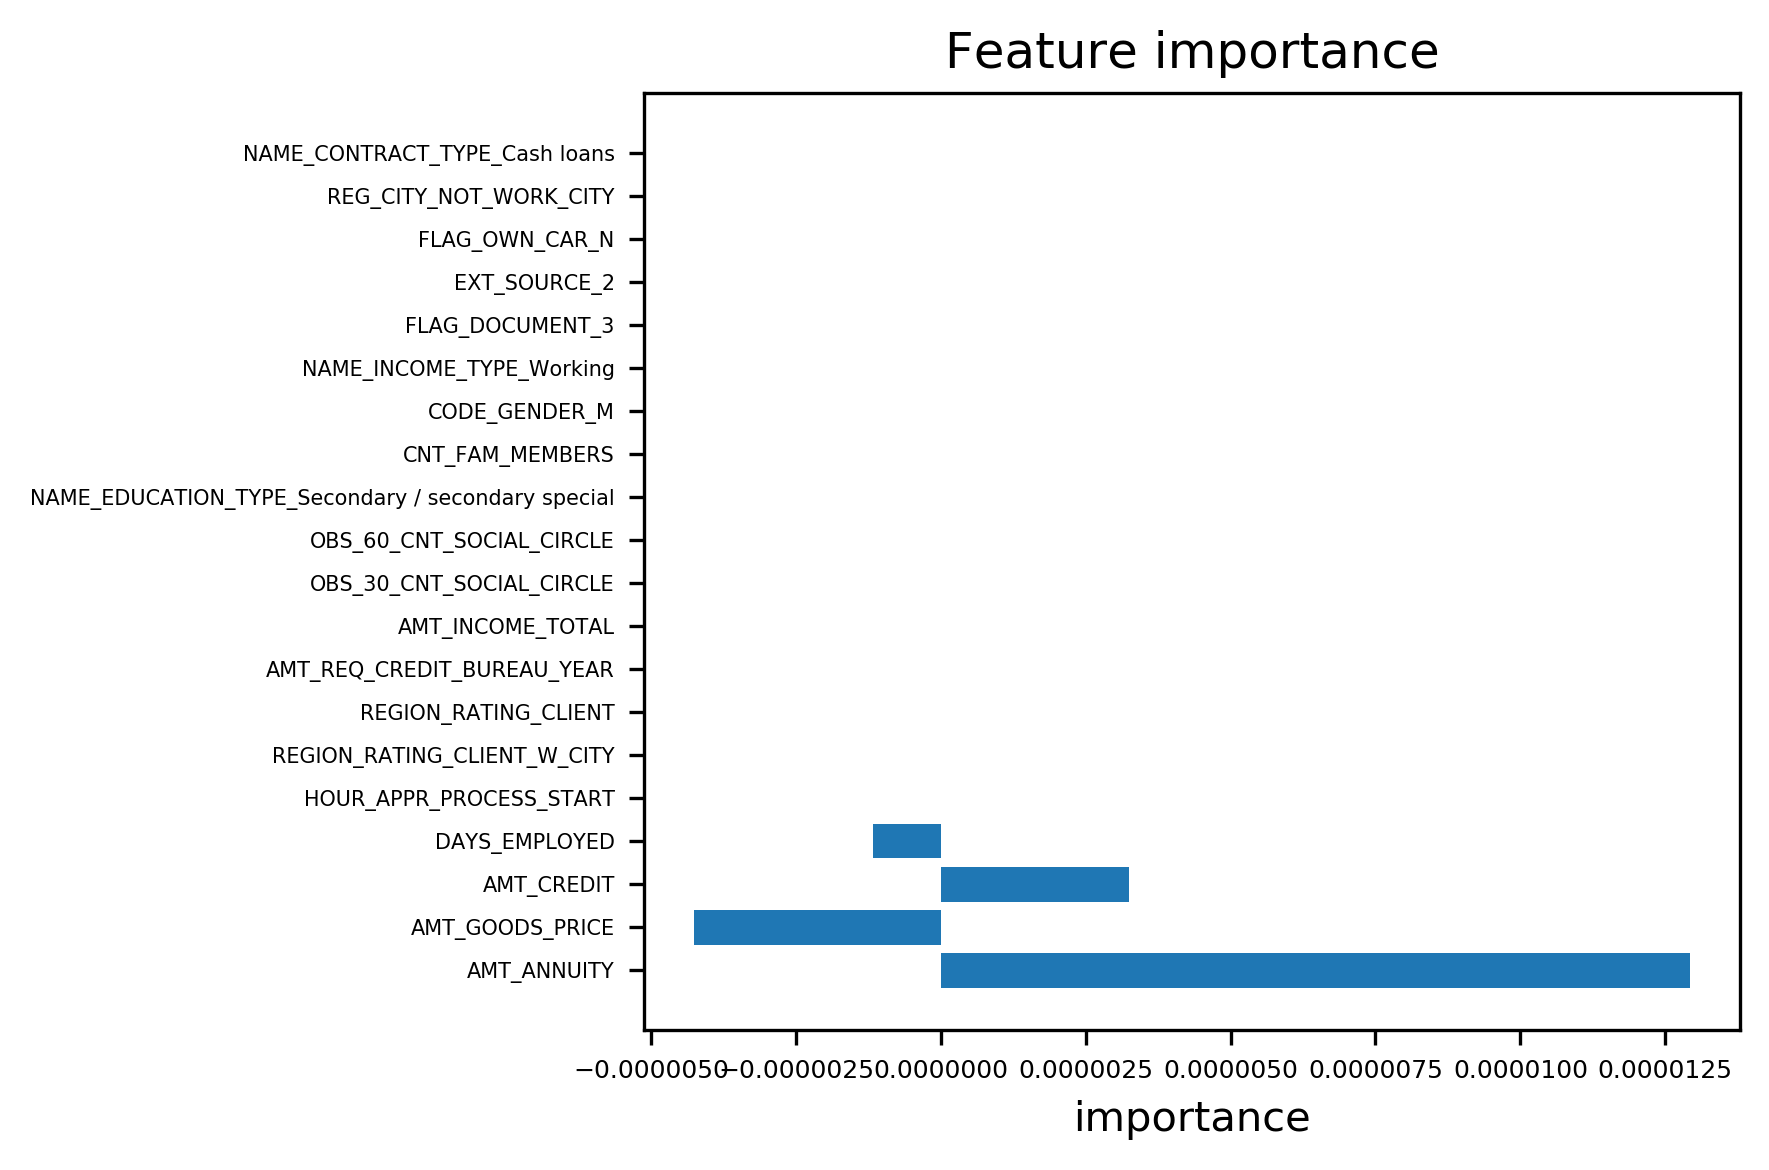

In [42]:
coef = sk_current.coef_[0].copy()
sorted_coef = sorted(range(len(coef)), key = lambda s: abs(coef[s]), reverse = True)
top20_f = []
top20_c = []
for i in range(20):
    top20_f.append(dff.columns[sorted_coef[i]])
    top20_c.append(coef[sorted_coef[i]])

plt.rcParams['figure.dpi'] = 300
plt.barh(top20_f, top20_c,)
plt.xlabel('importance')
plt.xticks(fontsize=6)
plt.yticks(fontsize=5)
plt.title('Feature importance')
plt.tight_layout()
plt.savefig('important_features_bu.png', transparent = True)
plt.show()

In [43]:
top20_c

[1.2929573755375558e-05,
 -4.263271015574008e-06,
 3.242346773113296e-06,
 -1.162215216631636e-06,
 4.18027038228179e-09,
 2.4786715673679843e-09,
 2.4416286413505623e-09,
 2.3849128885397574e-09,
 2.0288990245630902e-09,
 1.8281177267987431e-09,
 1.8043234893390325e-09,
 1.3842115796847922e-09,
 1.3639033474579375e-09,
 1.165703084693795e-09,
 1.0785249409217466e-09,
 9.878572365294705e-10,
 -9.414573135394382e-10,
 9.082076881097706e-10,
 8.755333907136022e-10,
 8.545889932955249e-10]

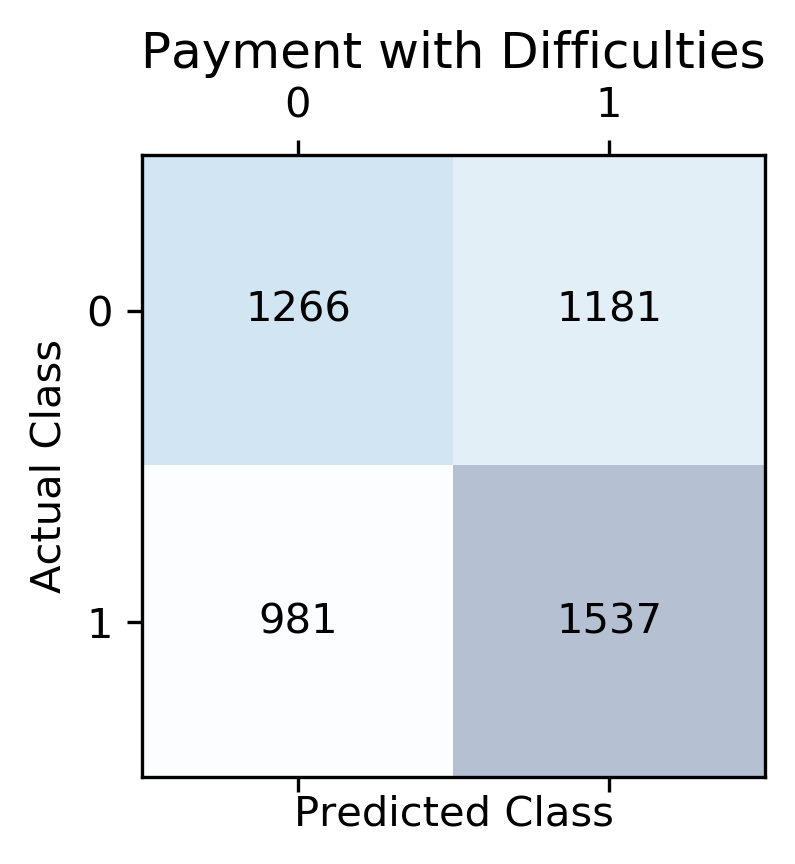

In [44]:
confmat = confusion_matrix(y_true=ybu_test, y_pred=sk_ypred)
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xticks([0, 1], [0, 1])
plt.yticks([0, 1], [0, 1])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Payment with Difficulties', y=1.1)
plt.tight_layout()
plt.savefig('undersampling_confusion_matrix.png', transparent = True)
plt.show()

AUC: 0.594166


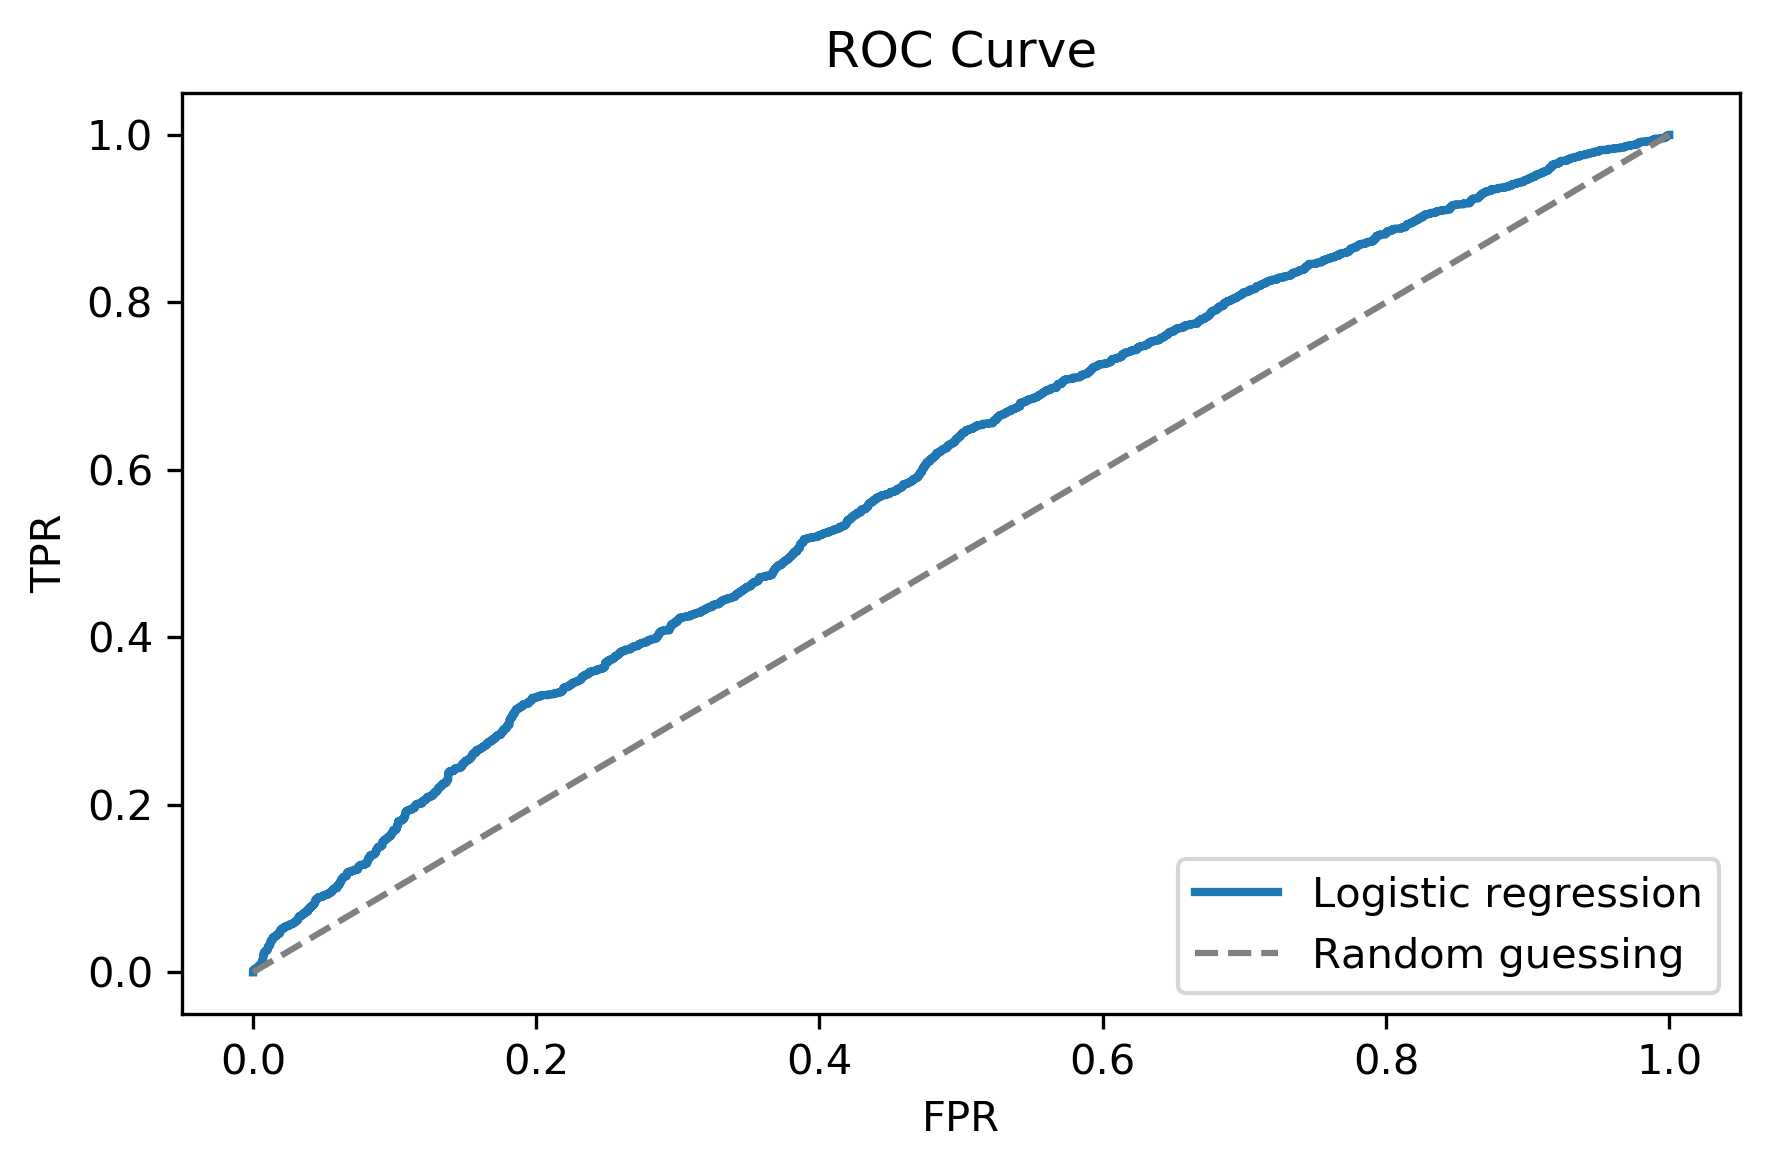

In [45]:
probas = sk_current.predict_proba(xbu_test)
fpr, tpr, thresholds = roc_curve(ybu_test, probas[:, 0], pos_label=0)
print('AUC: %f' %(auc(fpr, tpr)))

plt.plot(fpr, tpr, lw=2, label='Logistic regression')  
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random guessing')
#plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', color='gray', label='Perfect')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig('ROC_bu.png', transparent = True)
plt.show()

In [46]:
print("Accuracy: ", accuracy_bu)
print("Recall: ", recall_bu)
print("F1: ", f1_bu)
print("Precision: ", precision_bu)
print("Specificity: ", specificity_bu)
print("Opt score: ", opt_bu)

Accuracy:  0.564551863041289
Recall:  0.6104050833995235
F1:  0.5870893812070282
Precision:  0.5654893303899926
Specificity:  0.5173682059664896
Opt score:  -115399.52719033233


### using balanced data (over sampling)

In [47]:
file = open('balanced_data_over_sampling.pickle', 'rb')
df3 = pickle.load(file)
file.close()

In [48]:
display(df3)

{'X_subtrain': array([[1.000000e+00, 4.500000e+05, 7.551900e+05, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [0.000000e+00, 1.800000e+05, 5.925600e+05, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [0.000000e+00, 1.575000e+05, 5.850000e+05, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        ...,
        [0.000000e+00, 5.850000e+04, 9.765000e+05, ..., 0.000000e+00,
         0.000000e+00, 1.000000e+00],
        [1.000000e+00, 9.000000e+04, 8.086500e+05, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [0.000000e+00, 9.000000e+04, 5.084955e+05, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00]]),
 'X_valid': array([[0.000000e+00, 2.250000e+05, 6.300000e+05, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [0.000000e+00, 1.350000e+05, 5.430375e+05, ..., 0.000000e+00,
         0.000000e+00, 0.000000e+00],
        [0.000000e+00, 1.305000e+05, 6.469200e+05, ..., 0.000000e+00,
         0.000000e+00, 0.0

In [49]:
xbo_subtrain = df3['X_subtrain']
xbo_valid = df3['X_valid']
xbo_test = df3['X_test']
ybo_subtrain = df3['y_subtrain']
ybo_valid = df3['y_valid']
ybo_test = df3['y_test']

In [50]:
LR_bo = 0.0
max_score_bo = -10**10

accuracies_bo1 = []
recalls_bo1 = []
f1s_bo1 = []
precisions_bo1 = []
opts_bo1 = []
specificities_bo1 = []

for i in np.logspace(7,12,20):
    sk_current = LogisticRegression(C = 1/i).fit(xbu_subtrain, ybu_subtrain)
    sk_ypred = sk_current.predict(xbo_valid)
    score = opt_score(ybo_valid, sk_ypred, xbo_valid)
    
    accuracies_bo1.append(accuracy_score(ybo_valid, sk_ypred))
    recalls_bo1.append(recall_score(ybo_valid, sk_ypred))
    f1s_bo1.append(f1_score(ybo_valid, sk_ypred))
    precisions_bo1.append(precision_score(ybo_valid, sk_ypred))
    specificities_bo1.append(specificity_score(ybo_valid, sk_ypred))
    opts_bo1.append(score)
    
    if score > max_score_bo:
        max_score_bo = score
        LR_bo = i

In [51]:
result_bo1 = pd.DataFrame()
result_bo1['C'] = np.logspace(7,12,20)
result_bo1['Accuracy'] = accuracies_bo1
result_bo1['Precision'] = precisions_bo1
result_bo1['Recall'] = recalls_bo1
result_bo1['F1 Score'] = f1s_bo1
result_bo1['Specificity'] = specificities_bo1
result_bo1['Opt Score'] = opts_bo1

display(result_bo1)

,C,Accuracy,Precision,Recall,F1 Score,Specificity,Opt Score
0,1.000000e+07,0.541460,0.103037,0.607159,0.176177,0.535689,-5852.962664
1,1.832981e+07,0.541460,0.103037,0.607159,0.176177,0.535689,-5852.962664
2,3.359818e+07,0.541460,0.103037,0.607159,0.176177,0.535689,-5852.962664
3,6.158482e+07,0.541460,0.103037,0.607159,0.176177,0.535689,-5852.962664
4,1.128838e+08,0.541460,0.103037,0.607159,0.176177,0.535689,-5852.962664
5,2.069138e+08,0.541460,0.103037,0.607159,0.176177,0.535689,-5852.962664
6,3.792690e+08,0.541460,0.103037,0.607159,0.176177,0.535689,-5852.962664
7,6.951928e+08,0.541460,0.103037,0.607159,0.176177,0.535689,-5852.962664
8,1.274275e+09,0.541460,0.103037,0.607159,0.176177,0.535689,-5853.113222
9,2.335721e+09,0.541460,0.103037,0.607159,0.176177,0.535689,-5853.113222


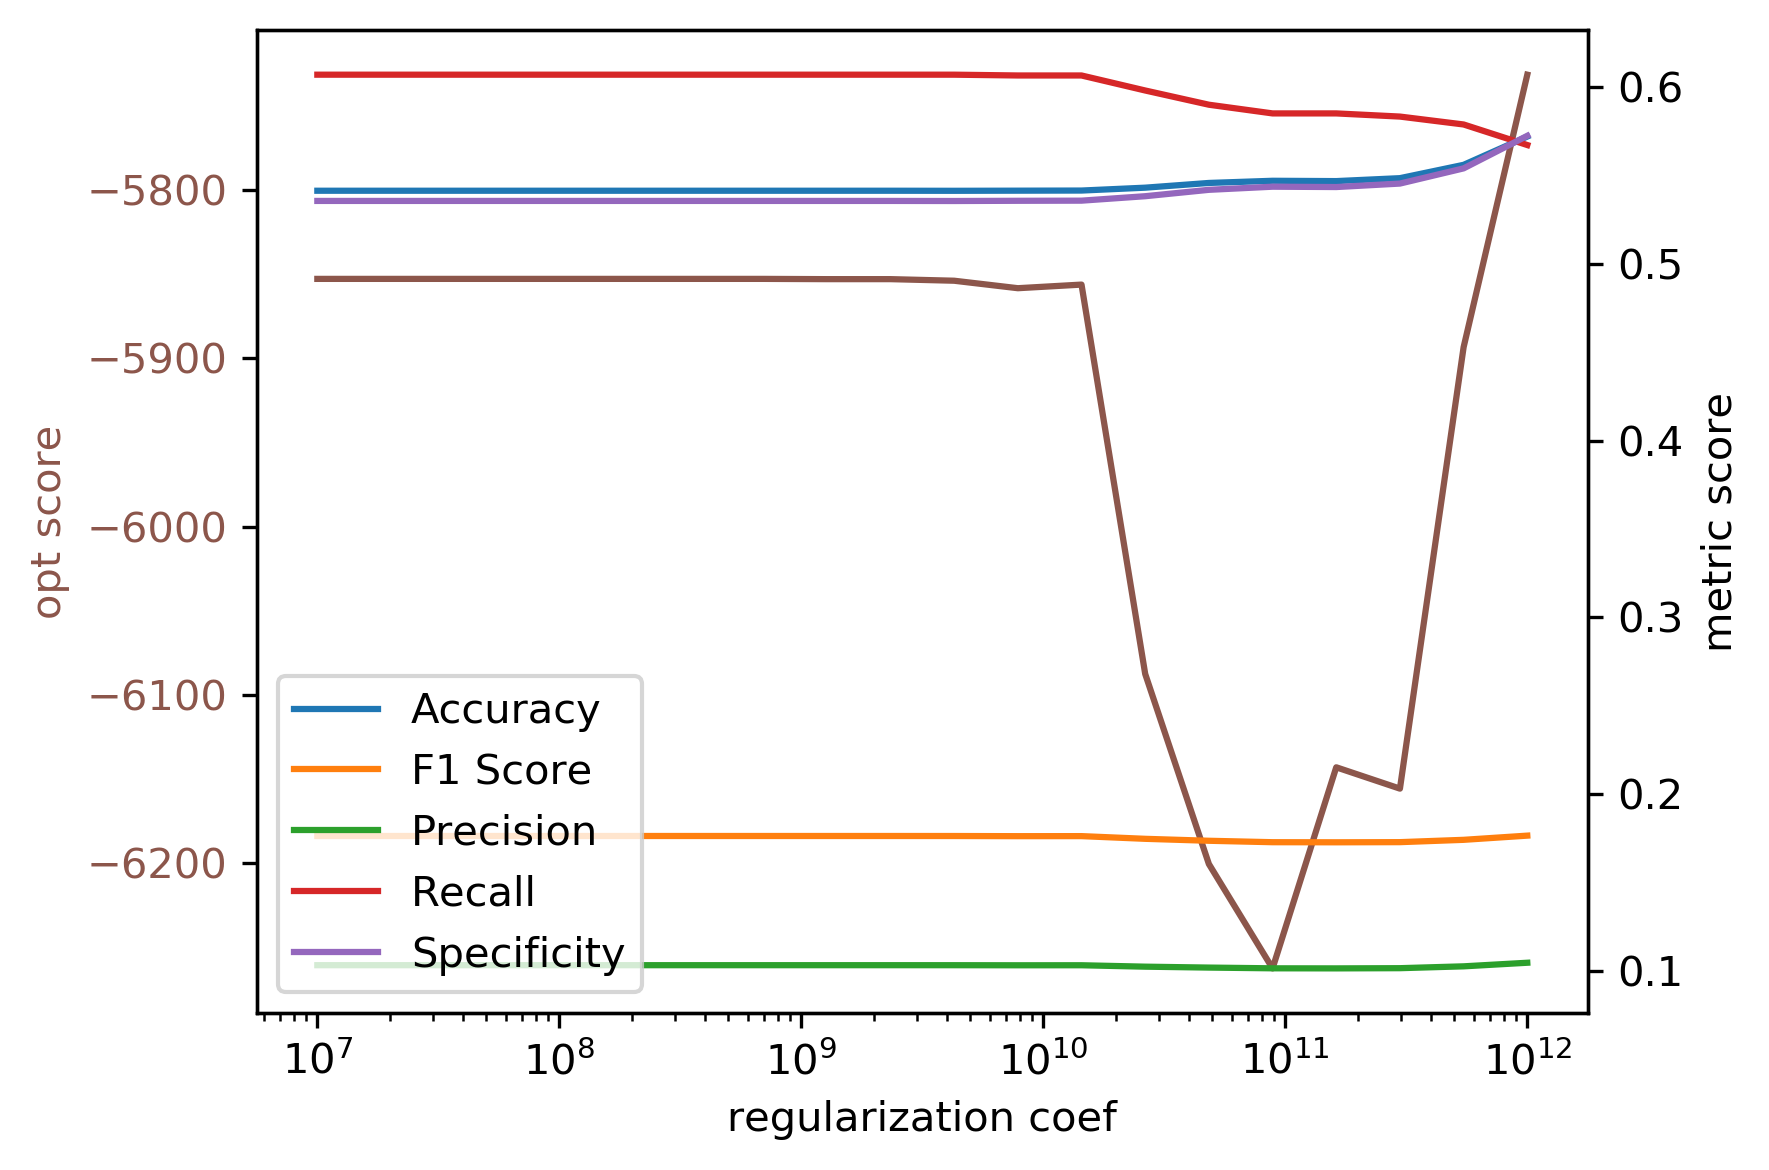

In [52]:
fig, ax1 = plt.subplots()

color = 'tab:brown'
ax1.set_xlabel('regularization coef')
ax1.set_ylabel('opt score', color=color)
ax1.plot(result_bo1['C'], result_bo1['Opt Score'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('metric score')  # we already handled the x-label with ax1

#ax2.tick_params(axis='y', labelcolor=color)
for x in ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Specificity']:
    ax2.plot(result_bo1['C'], result_bo1[x], label = x)

ax2.legend( loc='lower left')
plt.xscale('log') 
plt.xlabel('regularization coef')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('bo1.png', transparent = True)
plt.show()

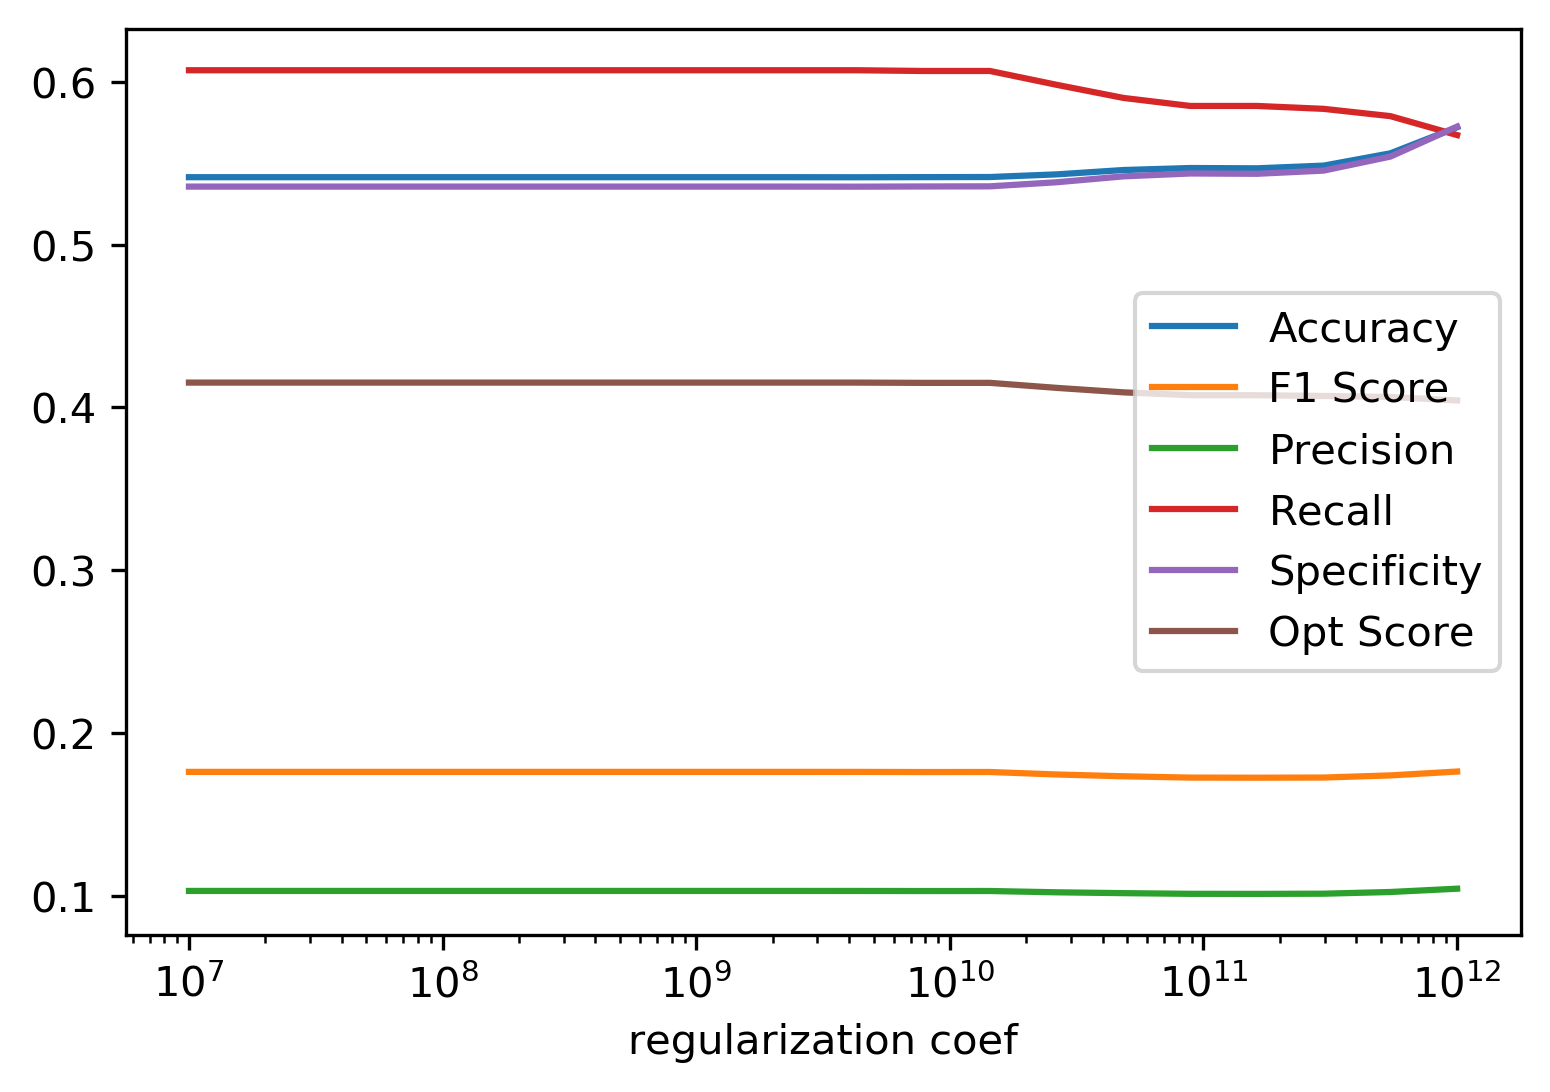

In [103]:
for x in ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Specificity', 'Opt Score']:
    plt.plot(result_bo1['C'], result_bo1[x], label = x)
plt.legend()
plt.xscale('log') 
plt.xlabel('regularization coef')
plt.savefig('bo1.png', transparent = True)
plt.show()

In [53]:
print(LR_bo)
print(max_score_bo)

1000000000000.0
-5731.737928604978


In [55]:
#plt.rcParams['figure.dpi'] = 300
#plt.savefig('over_sampling1.png', transparent = True)

<Figure size 1800x1200 with 0 Axes>

In [54]:
LR_bo2 = 0.0
max_score_bo2 = -10**10

accuracies_bo2 = []
recalls_bo2 = []
f1s_bo2 = []
precisions_bo2 = []
opts_bo2 = []
specificities_bo2 = []

for i in np.logspace(10,15,20):
    sk_current = LogisticRegression(C = 1/i).fit(xbu_subtrain, ybu_subtrain)
    sk_ypred = sk_current.predict(xbo_valid)
    score = opt_score(ybo_valid, sk_ypred, xbo_valid)
    
    accuracies_bo2.append(accuracy_score(ybo_valid, sk_ypred))
    recalls_bo2.append(recall_score(ybo_valid, sk_ypred))
    f1s_bo2.append(f1_score(ybo_valid, sk_ypred))
    precisions_bo2.append(precision_score(ybo_valid, sk_ypred))
    specificities_bo2.append(specificity_score(ybo_valid, sk_ypred))
    opts_bo2.append(score)
    
    if score > max_score_bo2:
        max_score_bo2 = score
        LR_bo2 = i

In [55]:
result_bo2 = pd.DataFrame()
result_bo2['C'] = np.logspace(10,15,20)
result_bo2['Accuracy'] = accuracies_bo2
result_bo2['Precision'] = precisions_bo2
result_bo2['Recall'] = recalls_bo2
result_bo2['F1 Score'] = f1s_bo2
result_bo2['Specificity'] = specificities_bo2
result_bo2['Opt Score'] = opts_bo2

display(result_bo2)

,C,Accuracy,Precision,Recall,F1 Score,Specificity,Opt Score
0,1.000000e+10,0.541497,0.102985,0.606711,0.176081,0.535768,-5858.494297
1,1.832981e+10,0.541858,0.102701,0.604027,0.175553,0.536397,-5922.776806
2,3.359818e+10,0.543990,0.101703,0.593289,0.173640,0.539659,-6183.182865
3,6.158482e+10,0.546808,0.101454,0.587025,0.173007,0.543275,-6243.407456
4,1.128838e+11,0.547241,0.101116,0.583893,0.172380,0.544022,-6288.381279
5,2.069138e+11,0.547205,0.101170,0.584340,0.172478,0.543943,-6162.840270
6,3.792690e+11,0.550276,0.101716,0.583445,0.173231,0.547363,-5992.187724
7,6.951928e+11,0.561694,0.103399,0.577181,0.175379,0.560333,-5733.843142
8,1.274275e+12,0.579362,0.104781,0.557942,0.176429,0.581244,-5834.788855
9,2.335721e+12,0.594573,0.105808,0.539597,0.176924,0.599403,-6025.576694


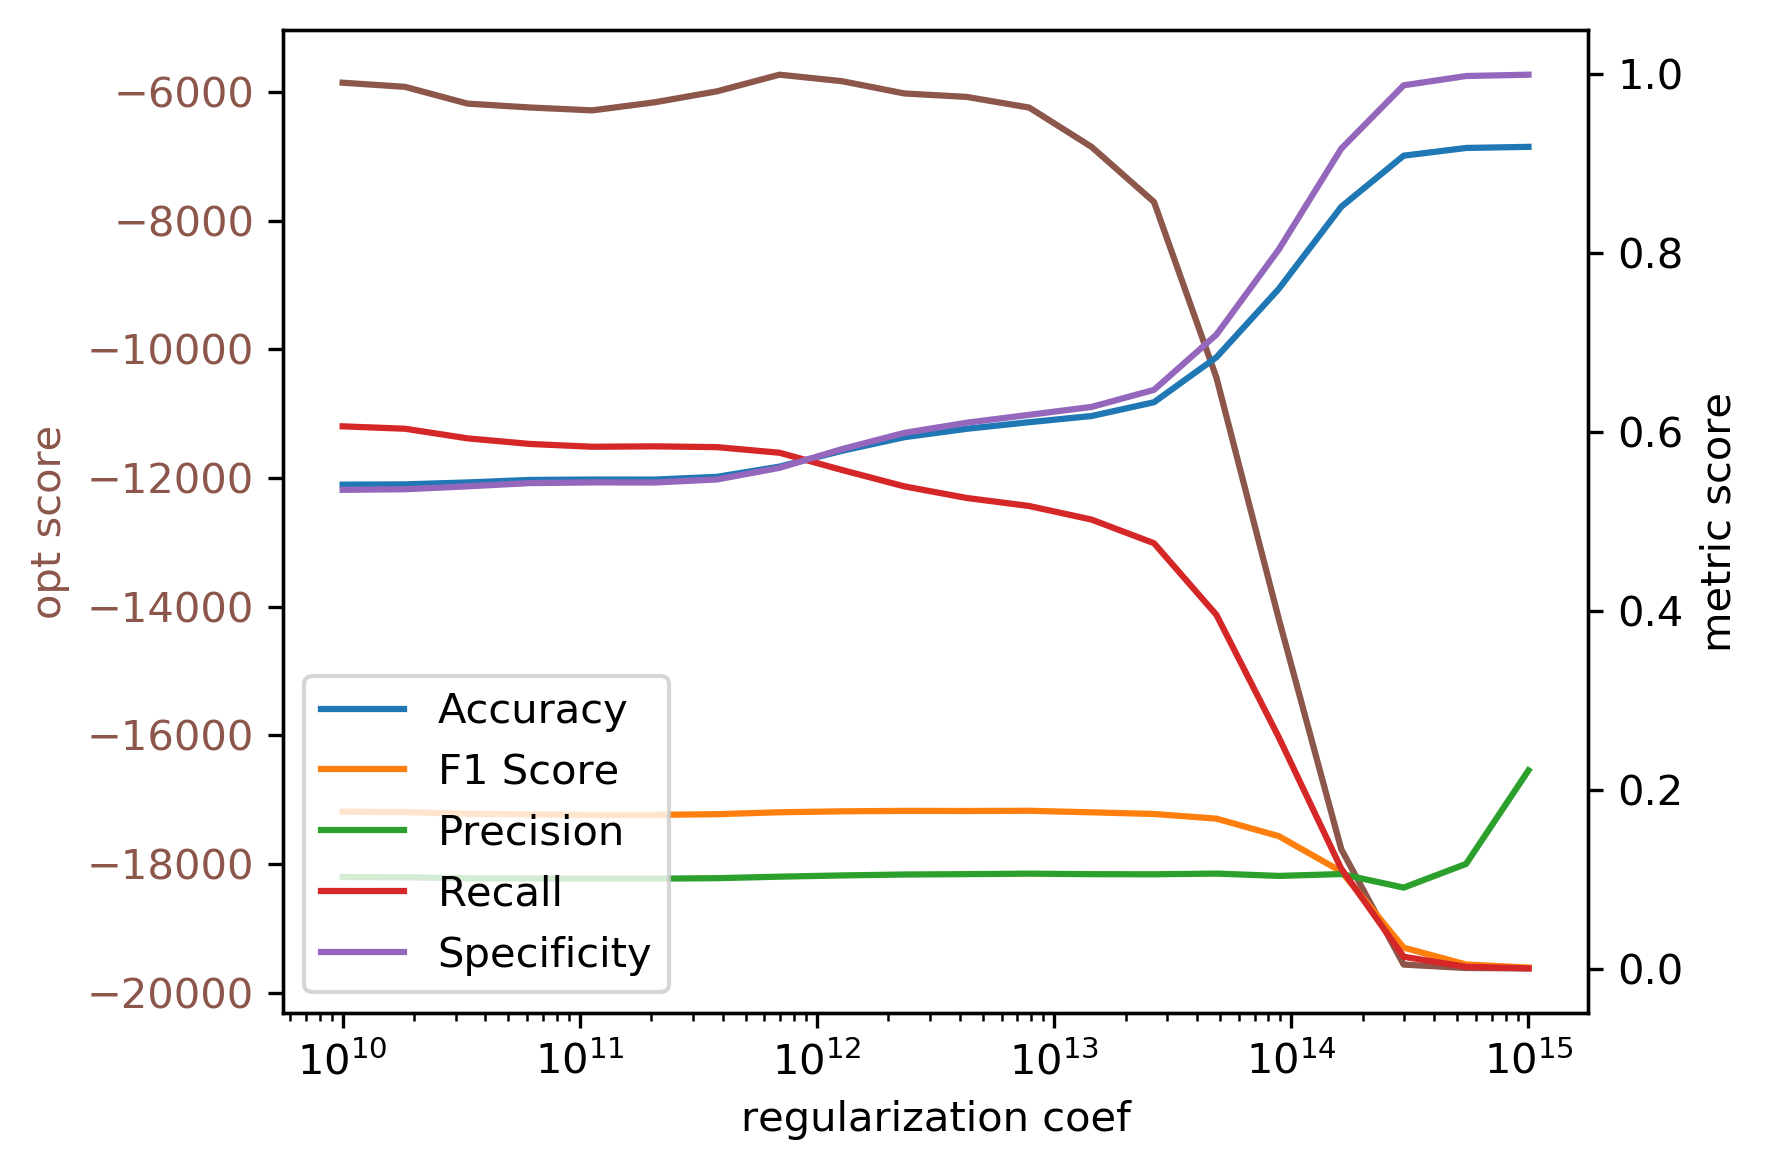

In [56]:
fig, ax1 = plt.subplots()

color = 'tab:brown'
ax1.set_xlabel('regularization coef')
ax1.set_ylabel('opt score', color=color)
ax1.plot(result_bo2['C'], result_bo2['Opt Score'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('metric score')  # we already handled the x-label with ax1

#ax2.tick_params(axis='y', labelcolor=color)
for x in ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Specificity']:
    ax2.plot(result_bo2['C'], result_bo2[x], label = x)

ax2.legend( loc='lower left')
plt.xscale('log') 
plt.xlabel('regularization coef')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('bo2.png', transparent = True)
plt.show()

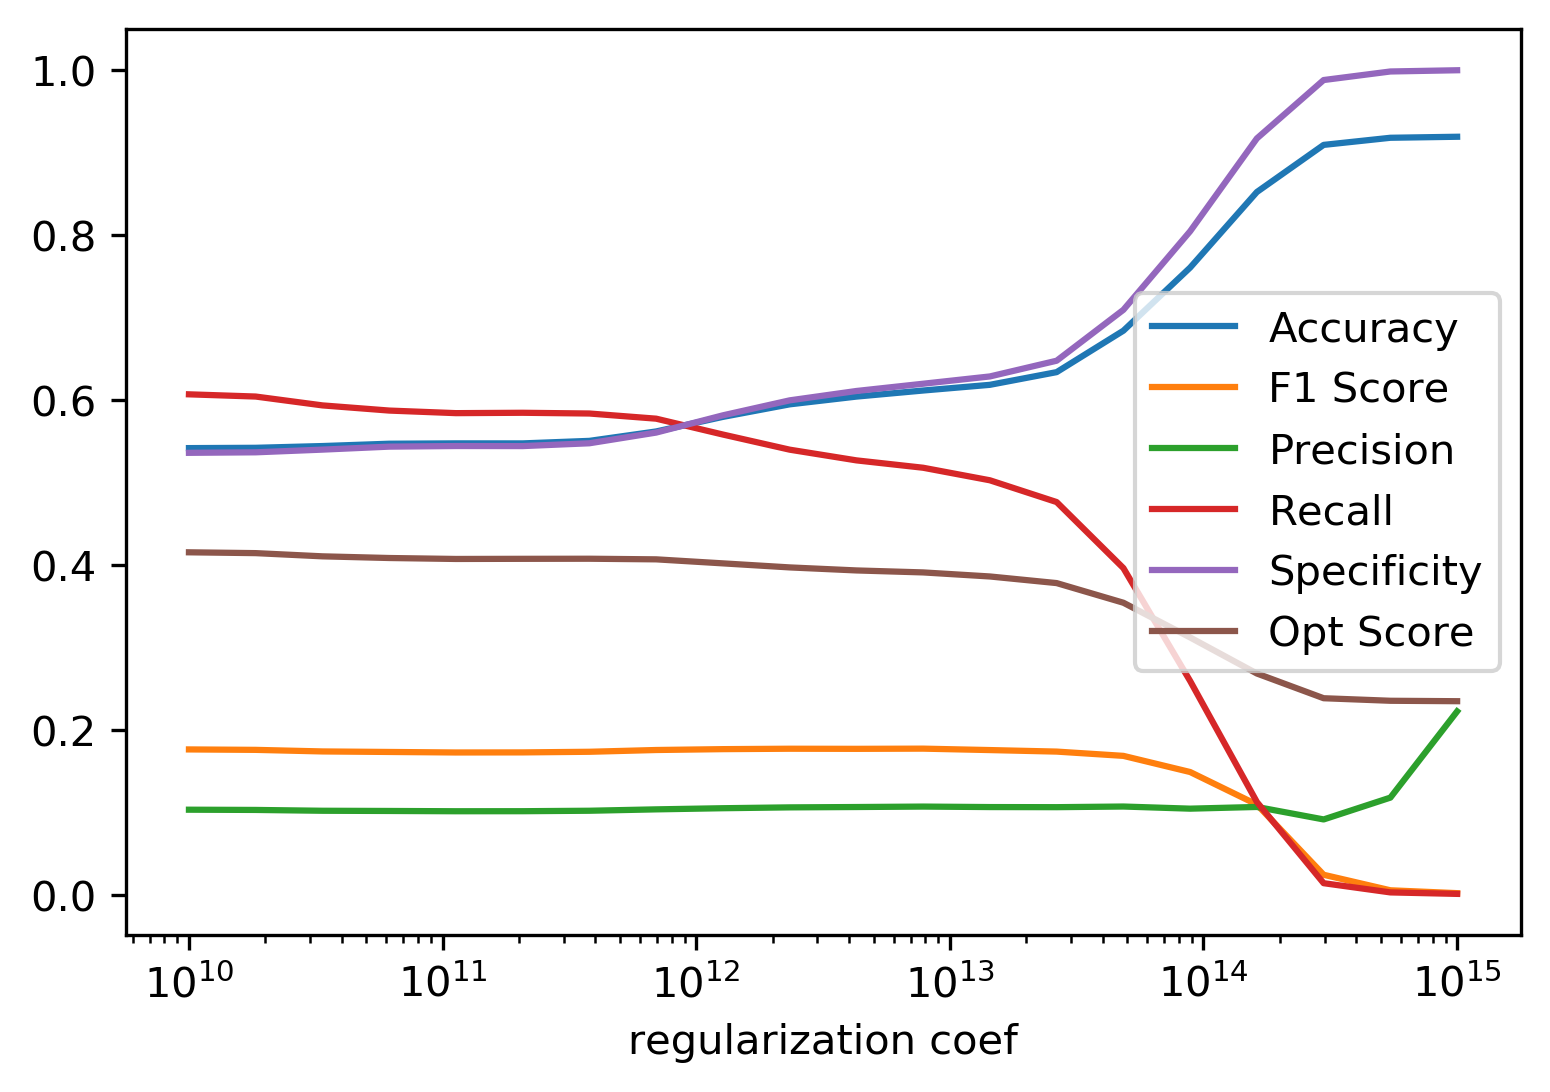

In [140]:
for x in ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Specificity', 'Opt Score']:
    plt.plot(result_bo2['C'], result_bo2[x], label = x)
plt.legend()
plt.xscale('log') 
plt.xlabel('regularization coef')
plt.savefig('bo2.png', transparent = True)
plt.show()

In [57]:
print(LR_bo2)
print(max_score_bo2)

695192796177.5591
-5733.843142320337


In [59]:
#plt.rcParams['figure.dpi'] = 300
#plt.savefig('over_sampling2.png', transparent = True)

<Figure size 1800x1200 with 0 Axes>

In [71]:
LR_bo3 = 0.0
max_score_bo3 = -10**10

accuracies_bo3 = []
recalls_bo3 = []
f1s_bo3 = []
precisions_bo3 = []
opts_bo3 = []
specificities_bo3 = []

for i in np.logspace(2,7,20):
    sk_current = LogisticRegression(C = 1/i).fit(xbu_subtrain, ybu_subtrain)
    sk_ypred = sk_current.predict(xbo_valid)
    score = opt_score(ybo_valid, sk_ypred, xbo_valid)
    
    accuracies_bo3.append(accuracy_score(ybo_valid, sk_ypred))
    recalls_bo3.append(recall_score(ybo_valid, sk_ypred))
    f1s_bo3.append(f1_score(ybo_valid, sk_ypred))
    precisions_bo3.append(precision_score(ybo_valid, sk_ypred))
    specificities_bo3.append(specificity_score(ybo_valid, sk_ypred))
    opts_bo3.append(score)
    
    if score > max_score_bo3:
        max_score_bo3 = score
        LR_bo3 = i

In [72]:
result_bo3 = pd.DataFrame()
result_bo3['C'] = np.logspace(2,7,20)
result_bo3['Accuracy'] = accuracies_bo3
result_bo3['Precision'] = precisions_bo3
result_bo3['Recall'] = recalls_bo3
result_bo3['F1 Score'] = f1s_bo3
result_bo3['Specificity'] = specificities_bo3
result_bo3['Opt Score'] = opts_bo3

display(result_bo3)

,C,Accuracy,Precision,Recall,F1 Score,Specificity,Opt Score
0,1.000000e+02,0.541460,0.103037,0.607159,0.176177,0.535689,-5852.962664
1,1.832981e+02,0.541460,0.103037,0.607159,0.176177,0.535689,-5852.962664
2,3.359818e+02,0.541460,0.103037,0.607159,0.176177,0.535689,-5852.962664
3,6.158482e+02,0.541460,0.103037,0.607159,0.176177,0.535689,-5852.962664
4,1.128838e+03,0.541460,0.103037,0.607159,0.176177,0.535689,-5852.962664
5,2.069138e+03,0.541460,0.103037,0.607159,0.176177,0.535689,-5852.962664
6,3.792690e+03,0.541460,0.103037,0.607159,0.176177,0.535689,-5852.962664
7,6.951928e+03,0.541460,0.103037,0.607159,0.176177,0.535689,-5852.962664
8,1.274275e+04,0.541460,0.103037,0.607159,0.176177,0.535689,-5852.962664
9,2.335721e+04,0.541497,0.103045,0.607159,0.176188,0.535728,-5852.179631


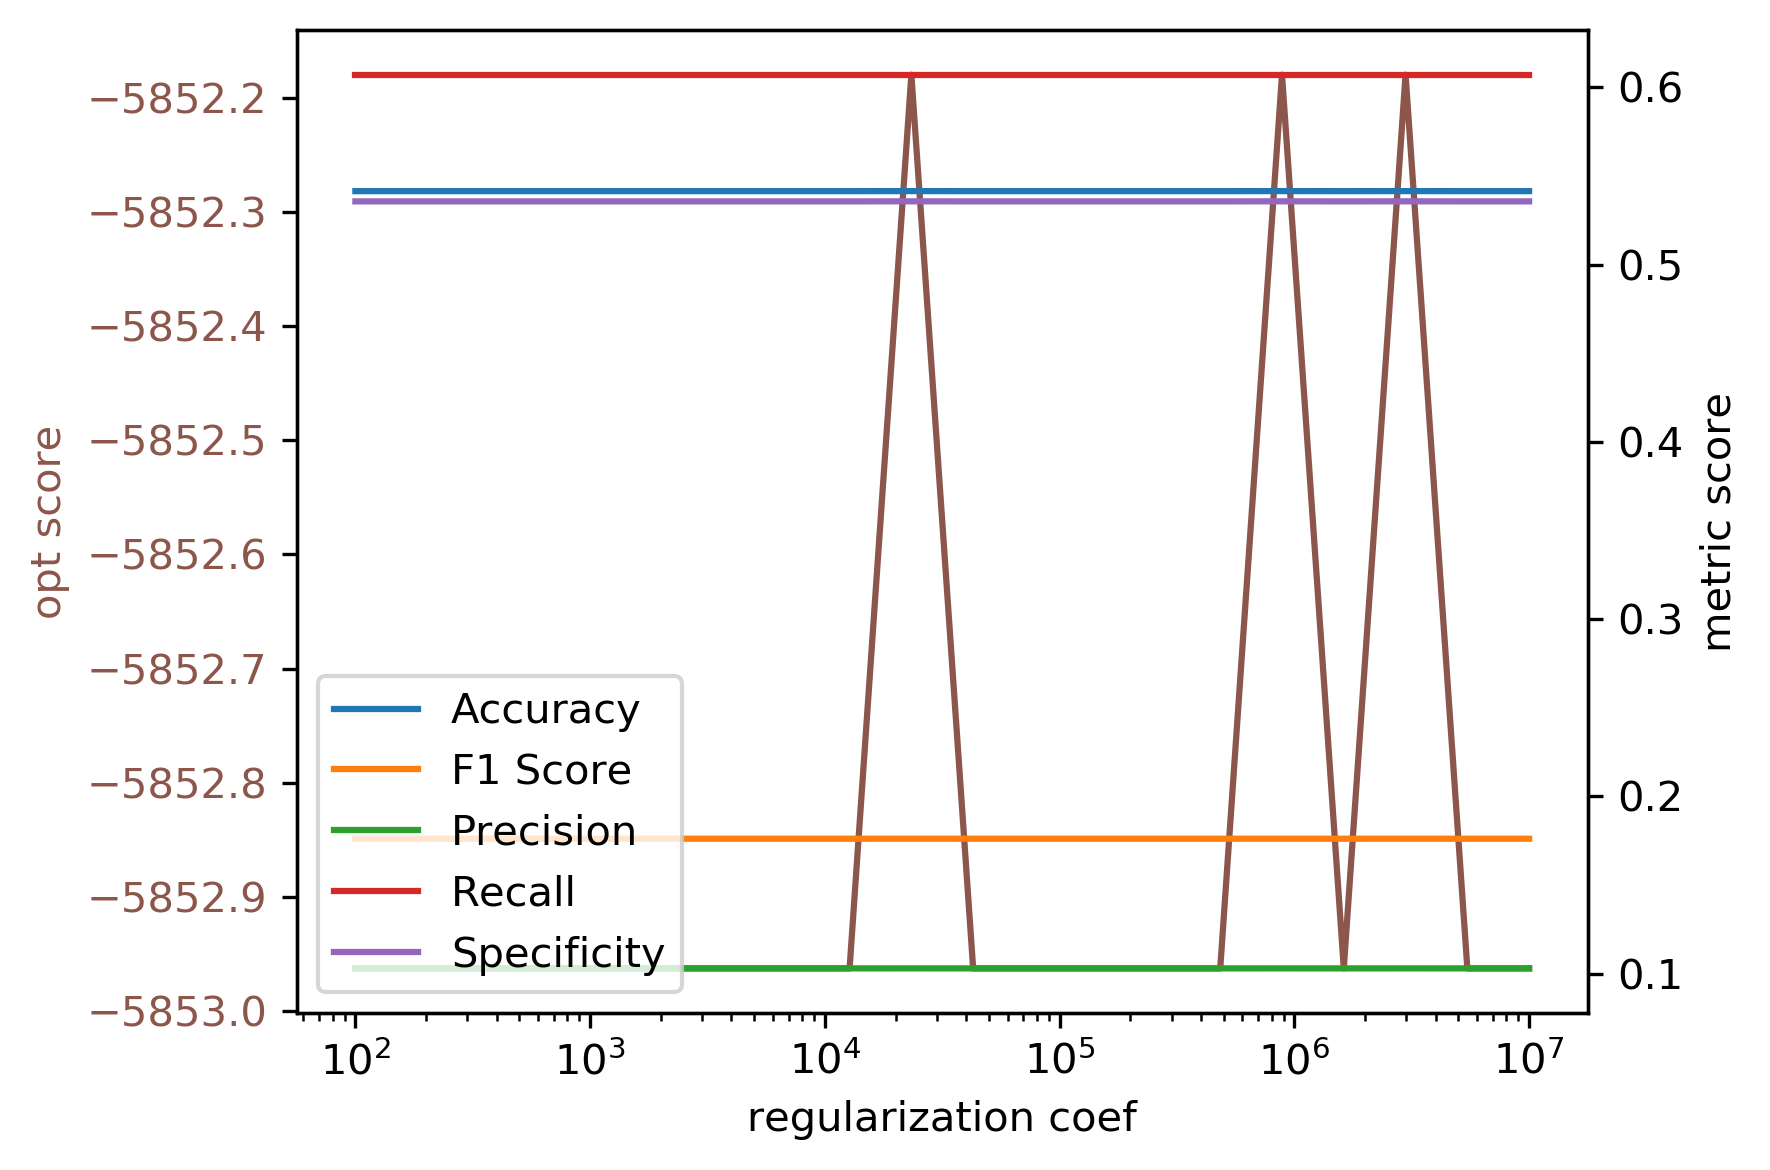

In [73]:
fig, ax1 = plt.subplots()

color = 'tab:brown'
ax1.set_xlabel('regularization coef')
ax1.set_ylabel('opt score', color=color)
ax1.plot(result_bo3['C'], result_bo3['Opt Score'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('metric score')  # we already handled the x-label with ax1

#ax2.tick_params(axis='y', labelcolor=color)
for x in ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Specificity']:
    ax2.plot(result_bo3['C'], result_bo3[x], label = x)

ax2.legend( loc='lower left')
plt.xscale('log') 
plt.xlabel('regularization coef')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('bo3.png', transparent = True)
plt.show()

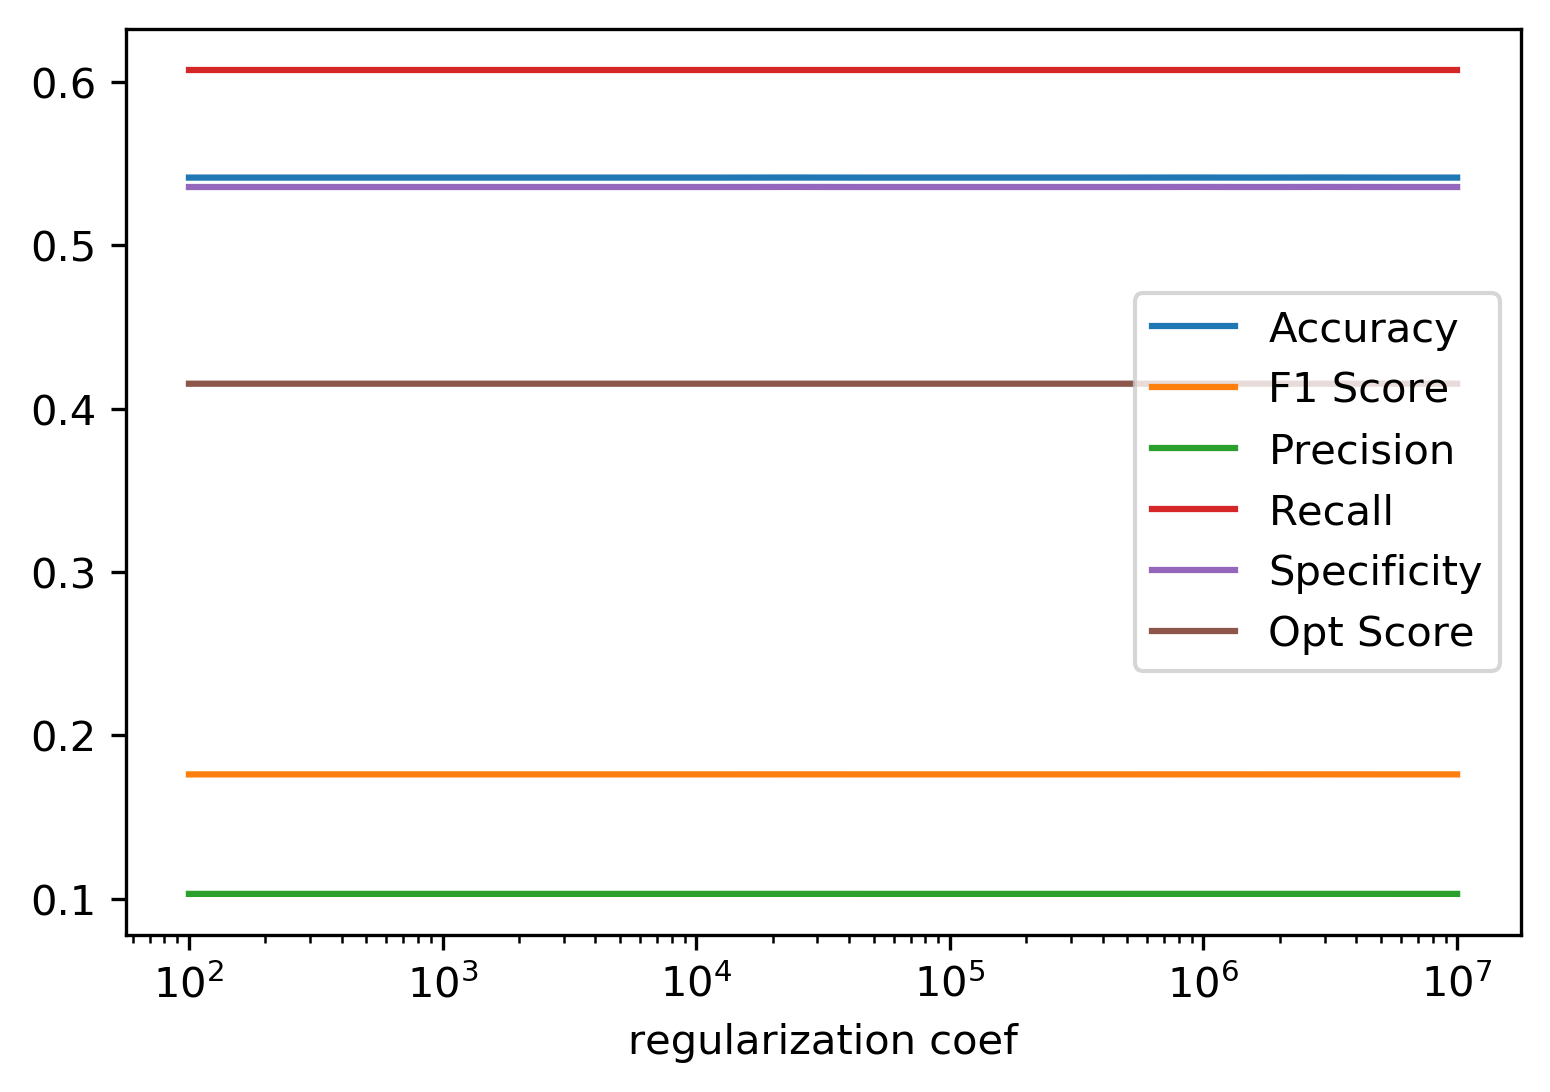

In [141]:
for x in ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Specificity', 'Opt Score']:
    plt.plot(result_bo3['C'], result_bo3[x], label = x)
plt.legend()
plt.xscale('log') 
plt.xlabel('regularization coef')
plt.savefig('bo3.png', transparent = True)
plt.show()

In [74]:
print(LR_bo3)
print(max_score_bo3)

23357.21469090121
-5852.179631101636


In [63]:
#plt.rcParams['figure.dpi'] = 300
#plt.savefig('over_sampling3.png', transparent = True)

<Figure size 1800x1200 with 0 Axes>

In [75]:
xbo_train = np.r_[xbo_subtrain, xbo_valid]
ybo_train = np.r_[ybo_subtrain, ybo_valid]

In [76]:
sk_current = LogisticRegression(C = 1/LR_bo).fit(xbo_train, ybo_train)
joblib.dump(sk_current, 'oversampling_model')
sk_ypred = sk_current.predict(xbo_test)
score = opt_score(ybo_test, sk_ypred, xbo_test)

accuracy_bo = accuracy_score(ybo_test, sk_ypred)
recall_bo = recall_score(ybo_test, sk_ypred)
f1_bo = f1_score(ybo_test, sk_ypred)
precision_bo = precision_score(ybo_test, sk_ypred)
specificity_bo = specificity_score(ybo_test, sk_ypred)
opt_bo = score

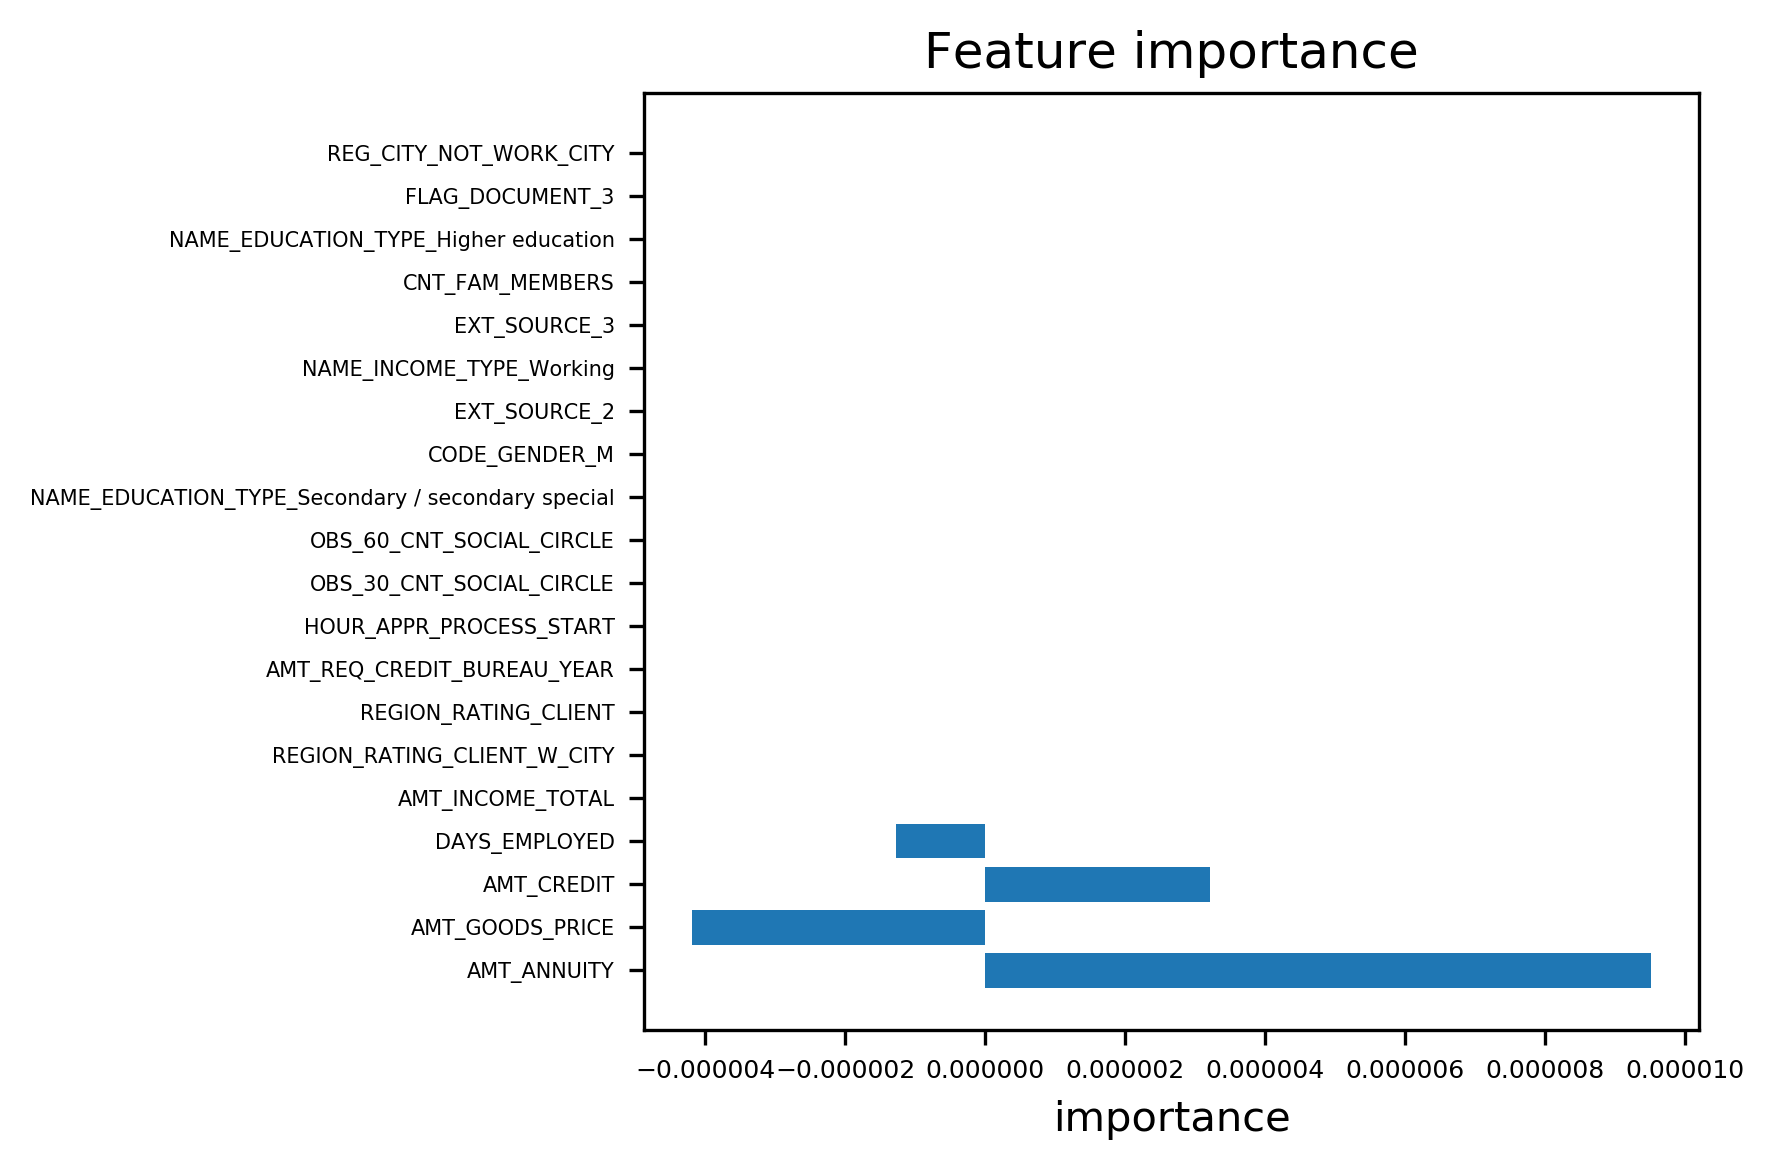

In [77]:
coef = sk_current.coef_[0].copy()
sorted_coef = sorted(range(len(coef)), key = lambda s: abs(coef[s]), reverse = True)
top20_f = []
top20_c = []
for i in range(20):
    top20_f.append(dff.columns[sorted_coef[i]])
    top20_c.append(coef[sorted_coef[i]])

plt.rcParams['figure.dpi'] = 300
plt.barh(top20_f, top20_c,)
plt.xlabel('importance')
plt.xticks(fontsize=6)
plt.yticks(fontsize=5)
plt.title('Feature importance')
plt.tight_layout()
plt.savefig('important_features_bo.png', transparent = True)
plt.show()

In [78]:
top20_c

[9.51911429721621e-06,
 -4.1905473520015075e-06,
 3.214790897687221e-06,
 -1.2732309918966759e-06,
 -3.748386604410618e-09,
 1.8046769597311608e-09,
 1.7919586124649036e-09,
 1.7917382123438832e-09,
 1.5979904467375005e-09,
 1.3634892036385805e-09,
 1.349768341211412e-09,
 1.0614654971748267e-09,
 9.236427174890198e-10,
 -9.035004590173282e-10,
 8.264242534087334e-10,
 -8.031640760703995e-10,
 8.010421698611195e-10,
 -7.693861816327999e-10,
 7.337674525662133e-10,
 6.820073879432296e-10]

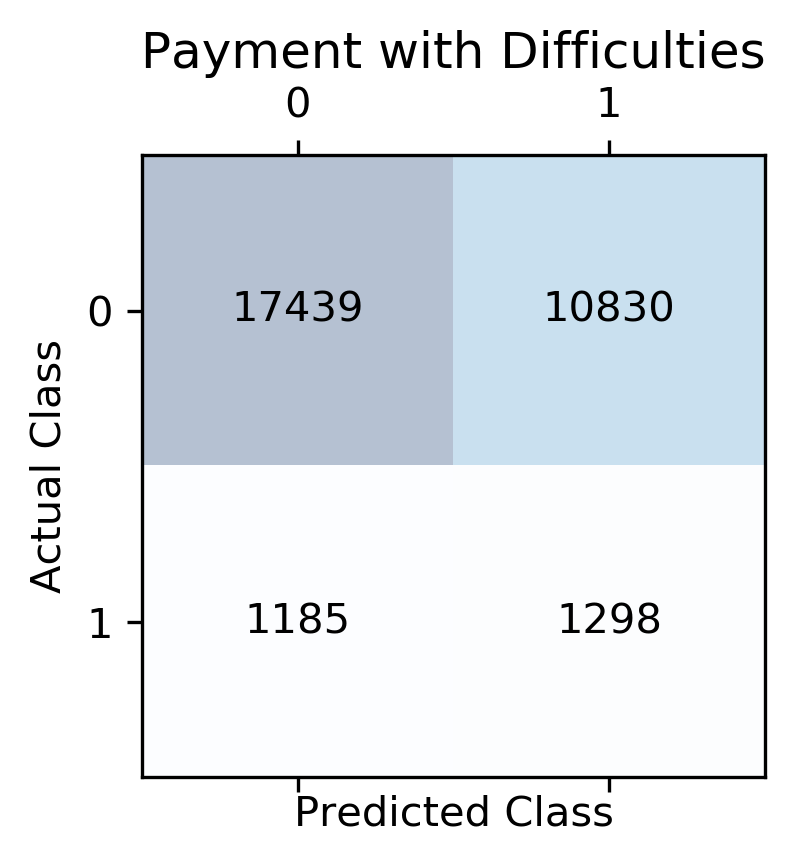

In [79]:
confmat = confusion_matrix(y_true=ybo_test, y_pred=sk_ypred)
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xticks([0, 1], [0, 1])
plt.yticks([0, 1], [0, 1])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Payment with Difficulties', y=1.1)
plt.tight_layout()
plt.savefig('oversampling_confusion_matrix.png', transparent = True)
plt.show()

AUC: 0.596564


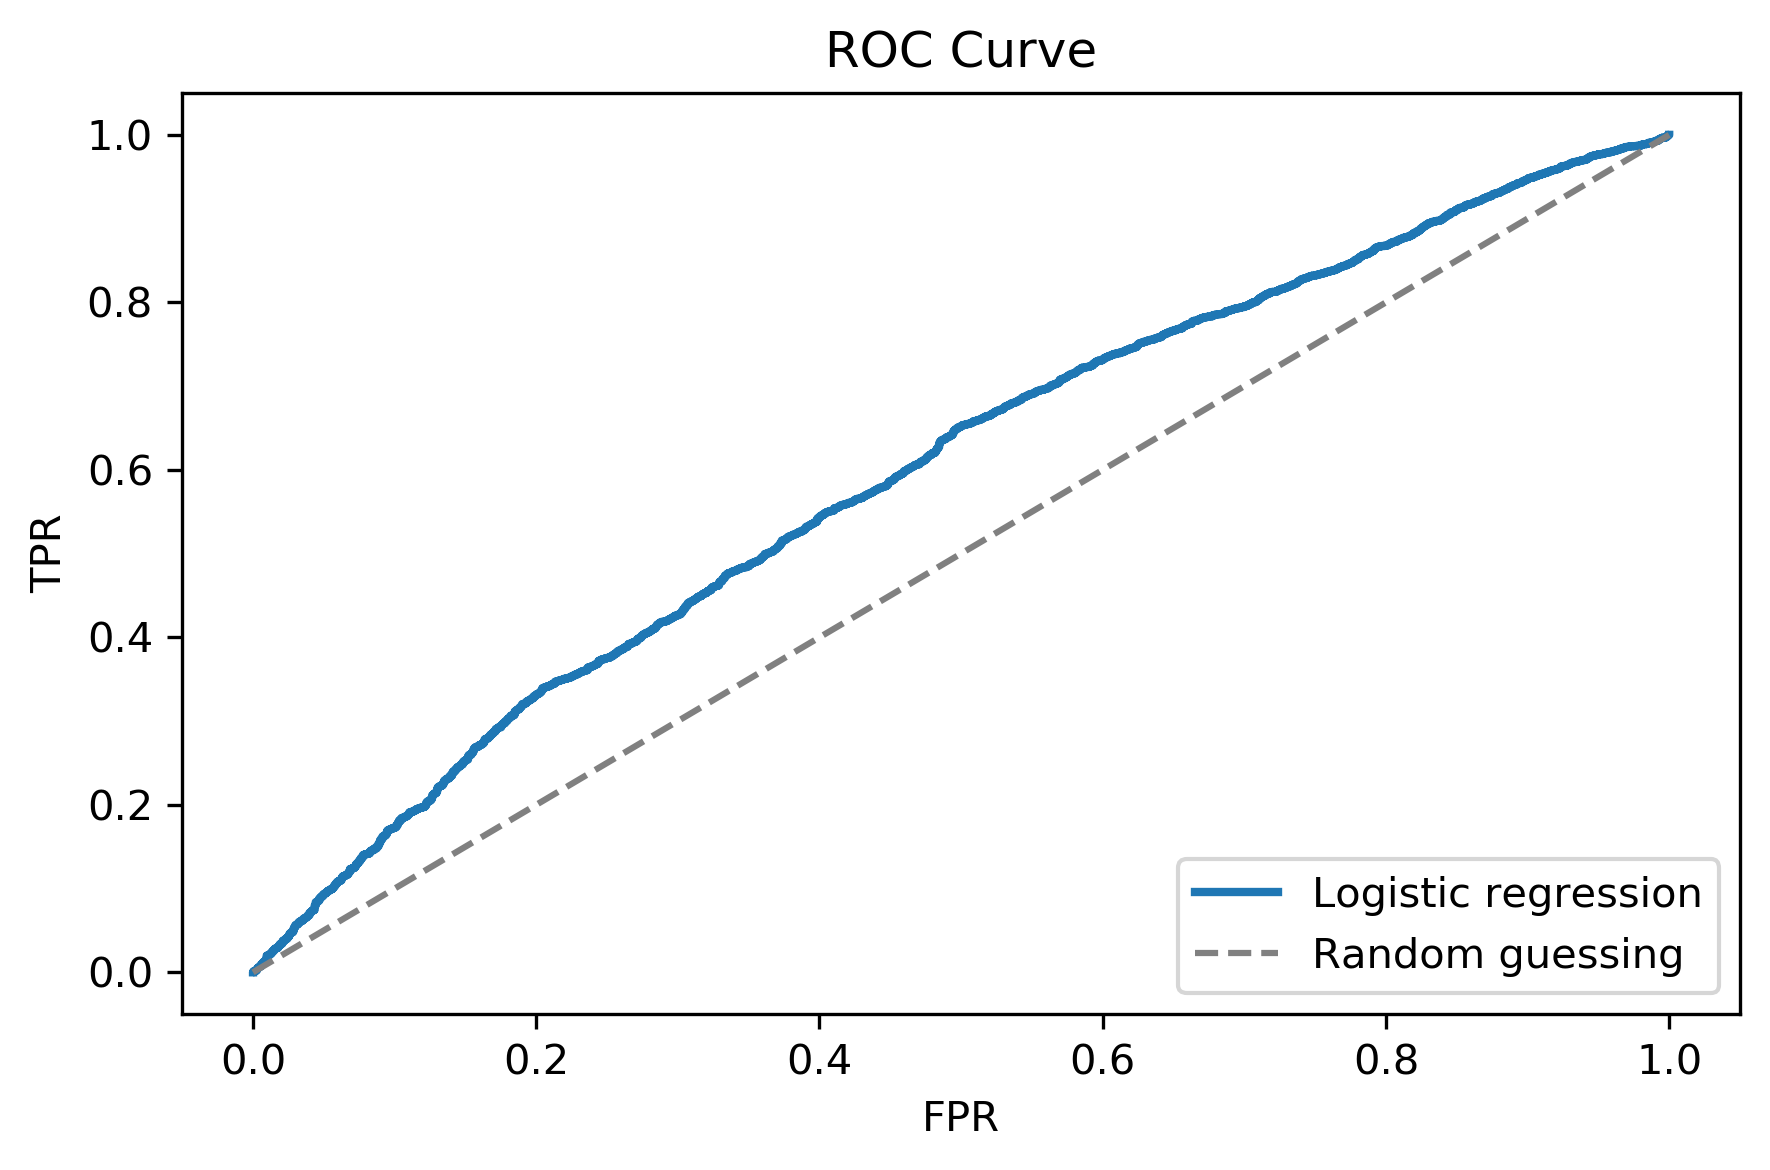

In [80]:
probas = sk_current.predict_proba(xbo_test)
fpr, tpr, thresholds = roc_curve(ybo_test, probas[:, 0], pos_label=0)
print('AUC: %f' %(auc(fpr, tpr)))

plt.plot(fpr, tpr, lw=2, label='Logistic regression')  
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random guessing')
#plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', color='gray', label='Perfect')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig('ROC_bo.png', transparent = True)
plt.show()

In [81]:
print("Accuracy: ", accuracy_bo)
print("Recall: ", recall_bo)
print("F1: ", f1_bo)
print("Precision: ", precision_bo)
print("Specificity: ", specificity_bo)
print("Opt score: ", opt_bo)

Accuracy:  0.6092937044745057
Recall:  0.522754732178816
F1:  0.17767435493806036
Precision:  0.10702506596306069
Specificity:  0.6168948317945453
Opt score:  -8288.34722782258
